In [1]:
import warnings
warnings.filterwarnings('ignore')
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pdb
from scipy import stats as st

### Change the dir_data below to point to the data downloaded from Zenodo.

In [2]:
dir_data = '/scratch/mh920/data_isca/ECS_peaks_paper/'

In [3]:
ctl_300 = xr.open_mfdataset(dir_data+'ctl_300.nc')
weights = np.cos(np.deg2rad(ctl_300.lat))
weights.name = "weights"
ctl_600 = xr.open_mfdataset(dir_data+'ctl_600.nc')
ctl_1200 = xr.open_mfdataset(dir_data+'ctl_1200.nc')
ctl_2400 = xr.open_mfdataset(dir_data+'ctl_2400.nc')
ctl_4800 = xr.open_mfdataset(dir_data+'ctl_4800.nc')
ctl_9600 = xr.open_mfdataset(dir_data+'ctl_9600.nc')
ctl_9600sqrt2 = xr.open_mfdataset(dir_data+'ctl_9600sqrt2.nc')
ctl_19200 = xr.open_mfdataset(dir_data+'ctl_19200.nc')
ctl_19200sqrt2 = xr.open_mfdataset(dir_data+'ctl_19200sqrt2.nc')
ctl_38400 = xr.open_mfdataset(dir_data+'ctl_38400.nc')
ctl_38400sqrt2 = xr.open_mfdataset(dir_data+'ctl_38400sqrt2.nc')
ctl_76800 = xr.open_mfdataset(dir_data+'ctl_76800.nc')
ctl_76800sqrt2 = xr.open_mfdataset(dir_data+'ctl_76800sqrt2.nc')

In [4]:
Ts = [ctl_300.t_surf.weighted(weights).mean(('lat')),
      ctl_600.t_surf.weighted(weights).mean(('lat')),
      ctl_1200.t_surf.weighted(weights).mean(('lat')),
      ctl_2400.t_surf.weighted(weights).mean(('lat')),
      ctl_4800.t_surf.weighted(weights).mean(('lat')),
      ctl_9600.t_surf.weighted(weights).mean(('lat')),
      ctl_9600sqrt2.t_surf.weighted(weights).mean(('lat')),
      ctl_19200.t_surf.weighted(weights).mean(('lat')),
      ctl_19200sqrt2.t_surf.weighted(weights).mean(('lat')),
      ctl_38400.t_surf.weighted(weights).mean(('lat')),
      ctl_38400sqrt2.t_surf.weighted(weights).mean(('lat')),
      ctl_76800.t_surf.weighted(weights).mean(('lat')),
      ctl_76800sqrt2.t_surf.weighted(weights).mean(('lat'))]
dTs = np.diff(Ts)
dTs[5:12]=dTs[5:12]*2

In [5]:
ctl_ = [ctl_300, ctl_600, ctl_1200, ctl_2400, ctl_4800, ctl_9600, ctl_9600sqrt2, ctl_19200, ctl_19200sqrt2, ctl_38400, ctl_38400sqrt2, 
        ctl_76800, ctl_76800sqrt2]
label_ = ['300ppm','600ppm','1200ppm','2400ppm','4800ppm','9600ppm','9600$\sqrt(2)$ppm','19200ppm','19200$\sqrt(2)$ppm','38400ppm',
          '38400$\sqrt(2)$ppm','76800ppm','76800$\sqrt(2)$ppm']
ilabel = ['i=0','i=1','i=2','i=3','i=4','i=5','i=5.5','i=6','i=6.5','i=7','i=7.5','i=8','i=8.5']
rhlabel = ['RH$_{0}$','RH$_{1}$','RH$_{2}$','RH$_{3}$','RH$_{4}$','RH$_{5}$','RH$_{5.5}$','RH$_{6}$','RH$_{6.5}$','RH$_{7}$','RH$_{7.5}$','RH$_{8}$','RH$_{8.5}$']
colors = plt.cm.coolwarm(np.linspace(0,1,13))

In [6]:
# tempz = ctl_300.temp.isel(time=slice(50,100)).mean('time').sel(lat=70,method='nearest').sel(lon=0,method='nearest').values
# p = ctl_300.pfull.values
# dTdz = np.zeros(len(tempz)-1)
# rho = np.zeros(len(tempz)-1)
# dz = np.zeros(len(tempz)-1)
# R_d = 287 # JK^-1kg^-1  gas constant of dry air
# g = 9.81  # m/s^2
# H_threshold = 2.0  # K/km this is the WHO threshold

# p_trop = np.zeros((len(ctl_300.lat),len(ctl_)))
# temp_trop = np.zeros((len(ctl_300.lat),len(ctl_)))
# for sim in range(len(ctl_)):
#     for i in range(len(ctl_300.lat)):
#         tempz = ctl_[sim].temp.isel(time=slice(50,100)).mean(('time','lon')).isel(lat=i).values
#         for lev in range(len(tempz)-2,-1,-1):
#             # diff from surface up
#             dT = tempz[lev+1] - tempz[lev]          # units = K
#             dp = (p[lev+1] - p[lev]) * 100  # units = Pa

#             # density
#             rho[lev] = (p[lev] * 100) / (R_d * tempz[lev])  # rho = p/(r_d*T)
#             # hydrostatic approximation units = km
#             dz[lev] = - dp / (rho[lev] * g) / 1000
#             # lapse rate dt/dz
#             # units = K/km
#             dTdz[lev] = (-dT / dz[lev])  # gamma > 0

#         for lev in range(len(tempz)-2,-1,-1):
#             if((dTdz[lev]<2) & (p[lev]<500)):
#                 p_trop[i,sim]=p[lev+1]
#                 temp_trop[i,sim] = tempz[lev+1]
#                 break
#             else:
#                 continue

In [7]:
# p_trop_conv = np.zeros((len(ctl_300.lat),len(ctl_)))
# temp_trop_conv = np.zeros((len(ctl_300.lat),len(ctl_)))
# for sim in range(len(ctl_)):
#     print(0)
#     if(sim>7):
#         for i in range(len(ctl_300.lat)):
#             tempz = ctl_[sim].temp.isel(time=slice(50,100)).mean(('time','lon')).isel(lat=i).values
#             conv = ctl_[sim].dt_tg_convection.isel(time=slice(50,100)).mean(('time','lon')).isel(lat=i).values
#             if((ctl_300.lat.isel(lat=i)>-30) & (ctl_300.lat.isel(lat=i)<30)):
#                 for lev in range(len(tempz)-2,-1,-1):
#                     if((conv[lev]<0.001/(24*3600)) & (p[lev]<50)):
#                         p_trop_conv[i,sim]=p[lev+1]
#                         temp_trop_conv[i,sim] = tempz[lev+1]
#                         break
#                     else:
#                         continue
#     else:
#         for i in range(len(ctl_300.lat)):
#             tempz = ctl_[sim].temp.isel(time=slice(50,100)).mean(('time','lon')).isel(lat=i).values
#             conv = ctl_[sim].dt_tg_convection.isel(time=slice(50,100)).mean(('time','lon')).isel(lat=i).values
#             if((ctl_300.lat.isel(lat=i)>-30) & (ctl_300.lat.isel(lat=i)<30)):
#                 for lev in range(len(tempz)-2,-1,-1):
#                     if((conv[lev]<0.001/(24*3600)) & (p[lev]<200)):
#                         p_trop_conv[i,sim]=p[lev+1]
#                         temp_trop_conv[i,sim] = tempz[lev+1]
#                         break
#                     else:
#                         continue

In [8]:
# tempz = ctl_300.temp.isel(time=slice(50,100)).mean('time').sel(lat=70,method='nearest').sel(lon=0,method='nearest').values
# p = ctl_300.pfull.values
# dTdz = np.zeros(len(tempz)-1)
# rho = np.zeros(len(tempz)-1)
# dz = np.zeros(len(tempz)-1)
# R_d = 287 # JK^-1kg^-1  gas constant of dry air
# g = 9.81  # m/s^2
# H_threshold = 2.0  # K/km this is the WHO threshold

# p_trop_rad = np.zeros((len(ctl_300.lat),len(ctl_)))
# temp_trop_rad = np.zeros((len(ctl_300.lat),len(ctl_)))
# for sim in range(len(ctl_)):
#     if(sim>7):
#         for i in range(len(ctl_300.lat)):
#             tempz = ctl_[sim].temp.isel(time=slice(50,100)).mean(('time','lon')).isel(lat=i).values
#             rad = ctl_[sim].soc_tdt_rad.isel(time=slice(50,100)).mean(('time','lon')).isel(lat=i).values
#             if((ctl_300.lat.isel(lat=i)>-30) & (ctl_300.lat.isel(lat=i)<30)):
#                 for lev in range(len(tempz)-2,-1,-1):
#                     if((rad[lev]>-0.001/(24*3600)) & (p[lev]<50)):
#                         p_trop_rad[i,sim]=p[lev+1]
#                         temp_trop_rad[i,sim] = tempz[lev+1]
#                         break
#                     else:
#                         continue
#     else:
#         for i in range(len(ctl_300.lat)):
#             tempz = ctl_[sim].temp.isel(time=slice(50,100)).mean(('time','lon')).isel(lat=i).values
#             rad = ctl_[sim].soc_tdt_rad.isel(time=slice(50,100)).mean(('time','lon')).isel(lat=i).values
#             if((ctl_300.lat.isel(lat=i)>-30) & (ctl_300.lat.isel(lat=i)<30)):
#                 for lev in range(len(tempz)-2,-1,-1):
#                     if((rad[lev]>-0.001/(24*3600)) & (p[lev]<200)):
#                         p_trop_rad[i,sim]=p[lev+1]
#                         temp_trop_rad[i,sim] = tempz[lev+1]
#                         break
#                     else:
#                         continue

In [9]:
# np.save('./data/p_trop.npy',p_trop)
# np.save('./data/temp_trop.npy',temp_trop)
# np.save('./data/p_trop_conv.npy',p_trop_conv)
# np.save('./data/temp_trop_conv.npy',temp_trop_conv)
# np.save('./data/p_trop_rad.npy',p_trop_rad)
# np.save('./data/temp_trop_rad.npy',temp_trop_rad)

In [10]:
p_trop = np.load(dir_data+'p_trop.npy')
temp_trop = np.load(dir_data+'temp_trop.npy')
p_trop_conv = np.load(dir_data+'p_trop_conv.npy')
temp_trop_conv = np.load(dir_data+'temp_trop_conv.npy')
p_trop_rad = np.load(dir_data+'p_trop_rad.npy')
temp_trop_rad = np.load(dir_data+'temp_trop_rad.npy')

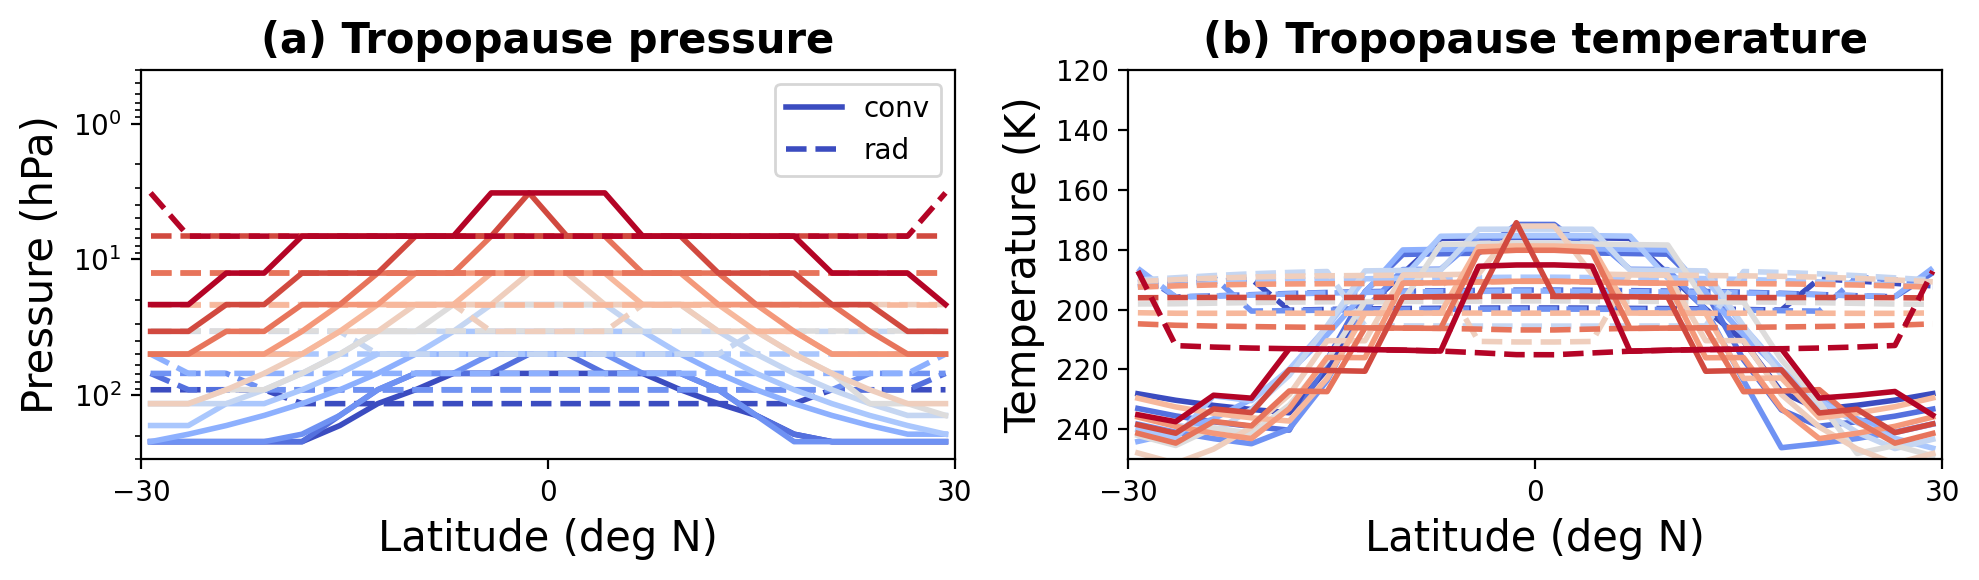

In [11]:
size=15
mask = (ctl_300.lat>-30) & (ctl_300.lat<30)
plt.figure(figsize=(10, 3),dpi=200)
plt.subplot(121)
i=0
plt.plot(ctl_300.lat[mask],p_trop_conv[mask,i],lw=2,c=colors[i],label='conv')
plt.plot(ctl_300.lat[mask],p_trop_rad[mask,i],lw=2,c=colors[i],ls='--',label='rad')
for i in range(1,len(ctl_)):
    plt.plot(ctl_300.lat[mask],p_trop_conv[mask,i],lw=2,c=colors[i])
    plt.plot(ctl_300.lat[mask],p_trop_rad[mask,i],lw=2,c=colors[i],ls='--')
plt.yscale('log')
plt.ylim([300,0.4])
plt.xlabel('Latitude (deg N)',fontsize=size)
plt.xticks(np.linspace(-90,90,7))
plt.xlim([-30,30])
plt.ylabel('Pressure (hPa)',fontsize=size)
plt.title('(a) Tropopause pressure',fontweight='bold',fontsize=size)
plt.legend()
plt.subplot(122)
for i in range(len(ctl_)):
    plt.plot(ctl_300.lat[mask],temp_trop_conv[mask,i],lw=2,c=colors[i])
    plt.plot(ctl_300.lat[mask],temp_trop_rad[mask,i],lw=2,c=colors[i],ls='--')
plt.ylim([250,120])
plt.xlabel('Latitude (deg N)',fontsize=size)
plt.xticks(np.linspace(-90,90,7))
plt.xlim([-30,30])
plt.ylabel('Temperature (K)',fontsize=size)
plt.title('(b) Tropopause temperature',fontweight='bold',fontsize=size)
plt.tight_layout()
plt.tight_layout()
# plt.savefig('./figs/figS2.pdf')
plt.show()

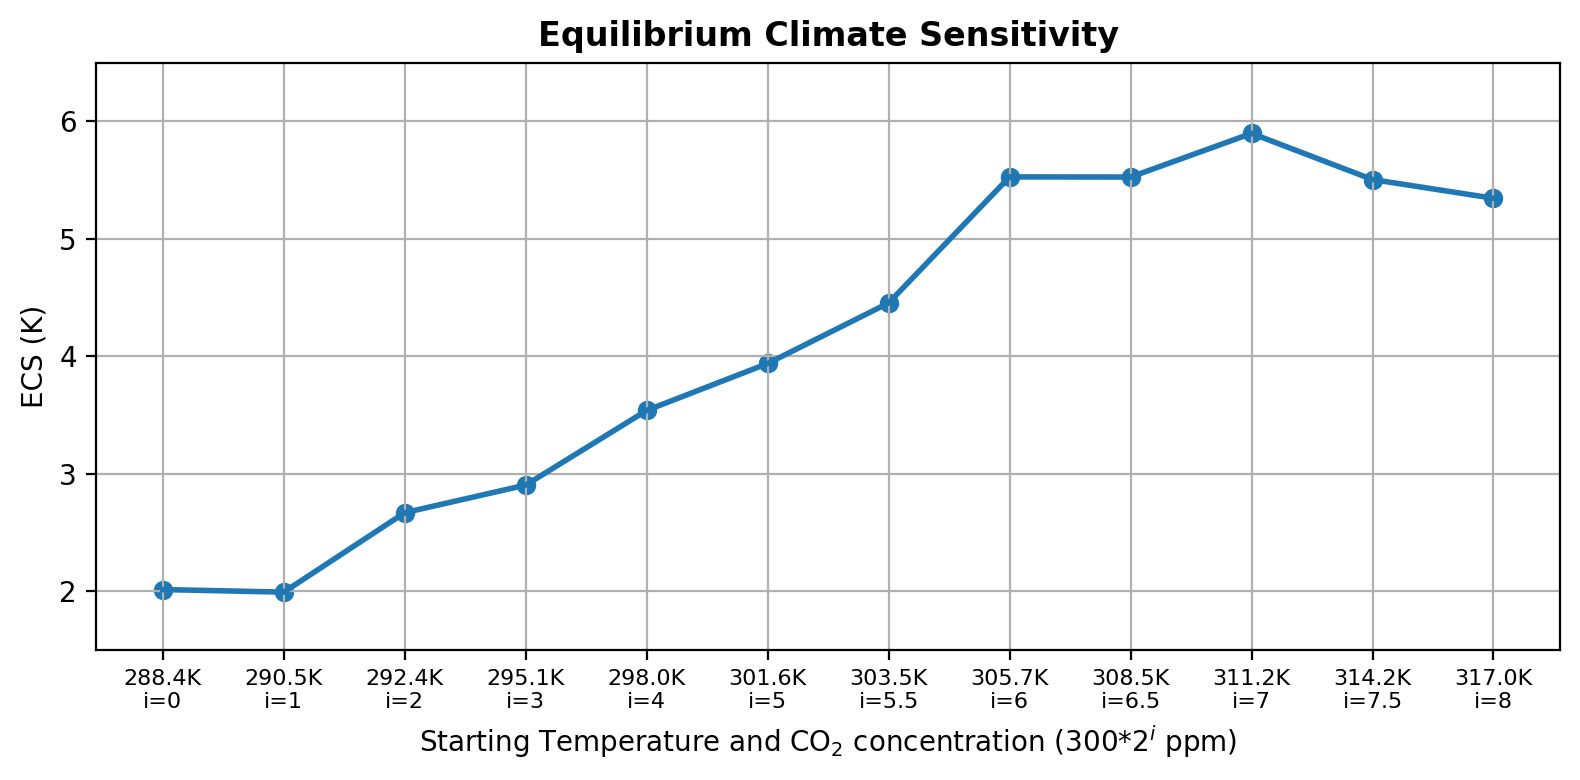

In [12]:
Tlabels=['288.4K','\ni=0',
         '290.5K','\ni=1',
         '292.4K','\ni=2',
         '295.1K','\ni=3',
         '298.0K','\ni=4',
         '301.6K','\ni=5',
         '303.5K','\ni=5.5',
         '305.7K','\ni=6',
         '308.5K','\ni=6.5',
         '311.2K','\ni=7',
         '314.2K','\ni=7.5',
         '317.0K','\ni=8']
ticklabels = [ ''.join(x) for x in zip(Tlabels[0::2], Tlabels[1::2])]

plt.figure(figsize=(8, 4),dpi=200)
plt.scatter(np.arange(12),dTs[0:12])
plt.plot(np.arange(12), dTs[0:12] ,lw=2)
plt.grid()
plt.xticks(np.arange(12),ticklabels,fontsize=8,rotation=0)
plt.ylabel('ECS (K)')
plt.xlabel('Starting Temperature and CO$_2$ concentration (300*2$^i$ ppm)')
plt.ylim([1.5,6.5])
plt.title('Equilibrium Climate Sensitivity', weight = 'bold')
plt.tight_layout()
plt.savefig('./figs/fig1.pdf')
plt.show()

In [13]:
col_300ppm_17 = xr.open_mfdataset(dir_data+'col_300ppm_17.nc')
col_9600ppm_17 = xr.open_mfdataset(dir_data+'col_9600ppm_17.nc')
col_307200ppm_17 = xr.open_mfdataset(dir_data+'col_307200ppm_17.nc')
col_300ppm_350 = xr.open_mfdataset(dir_data+'col_300ppm_350.nc')
col_9600ppm_350 = xr.open_mfdataset(dir_data+'col_9600ppm_350.nc')
col_307200ppm_350 = xr.open_mfdataset(dir_data+'col_307200ppm_350.nc')

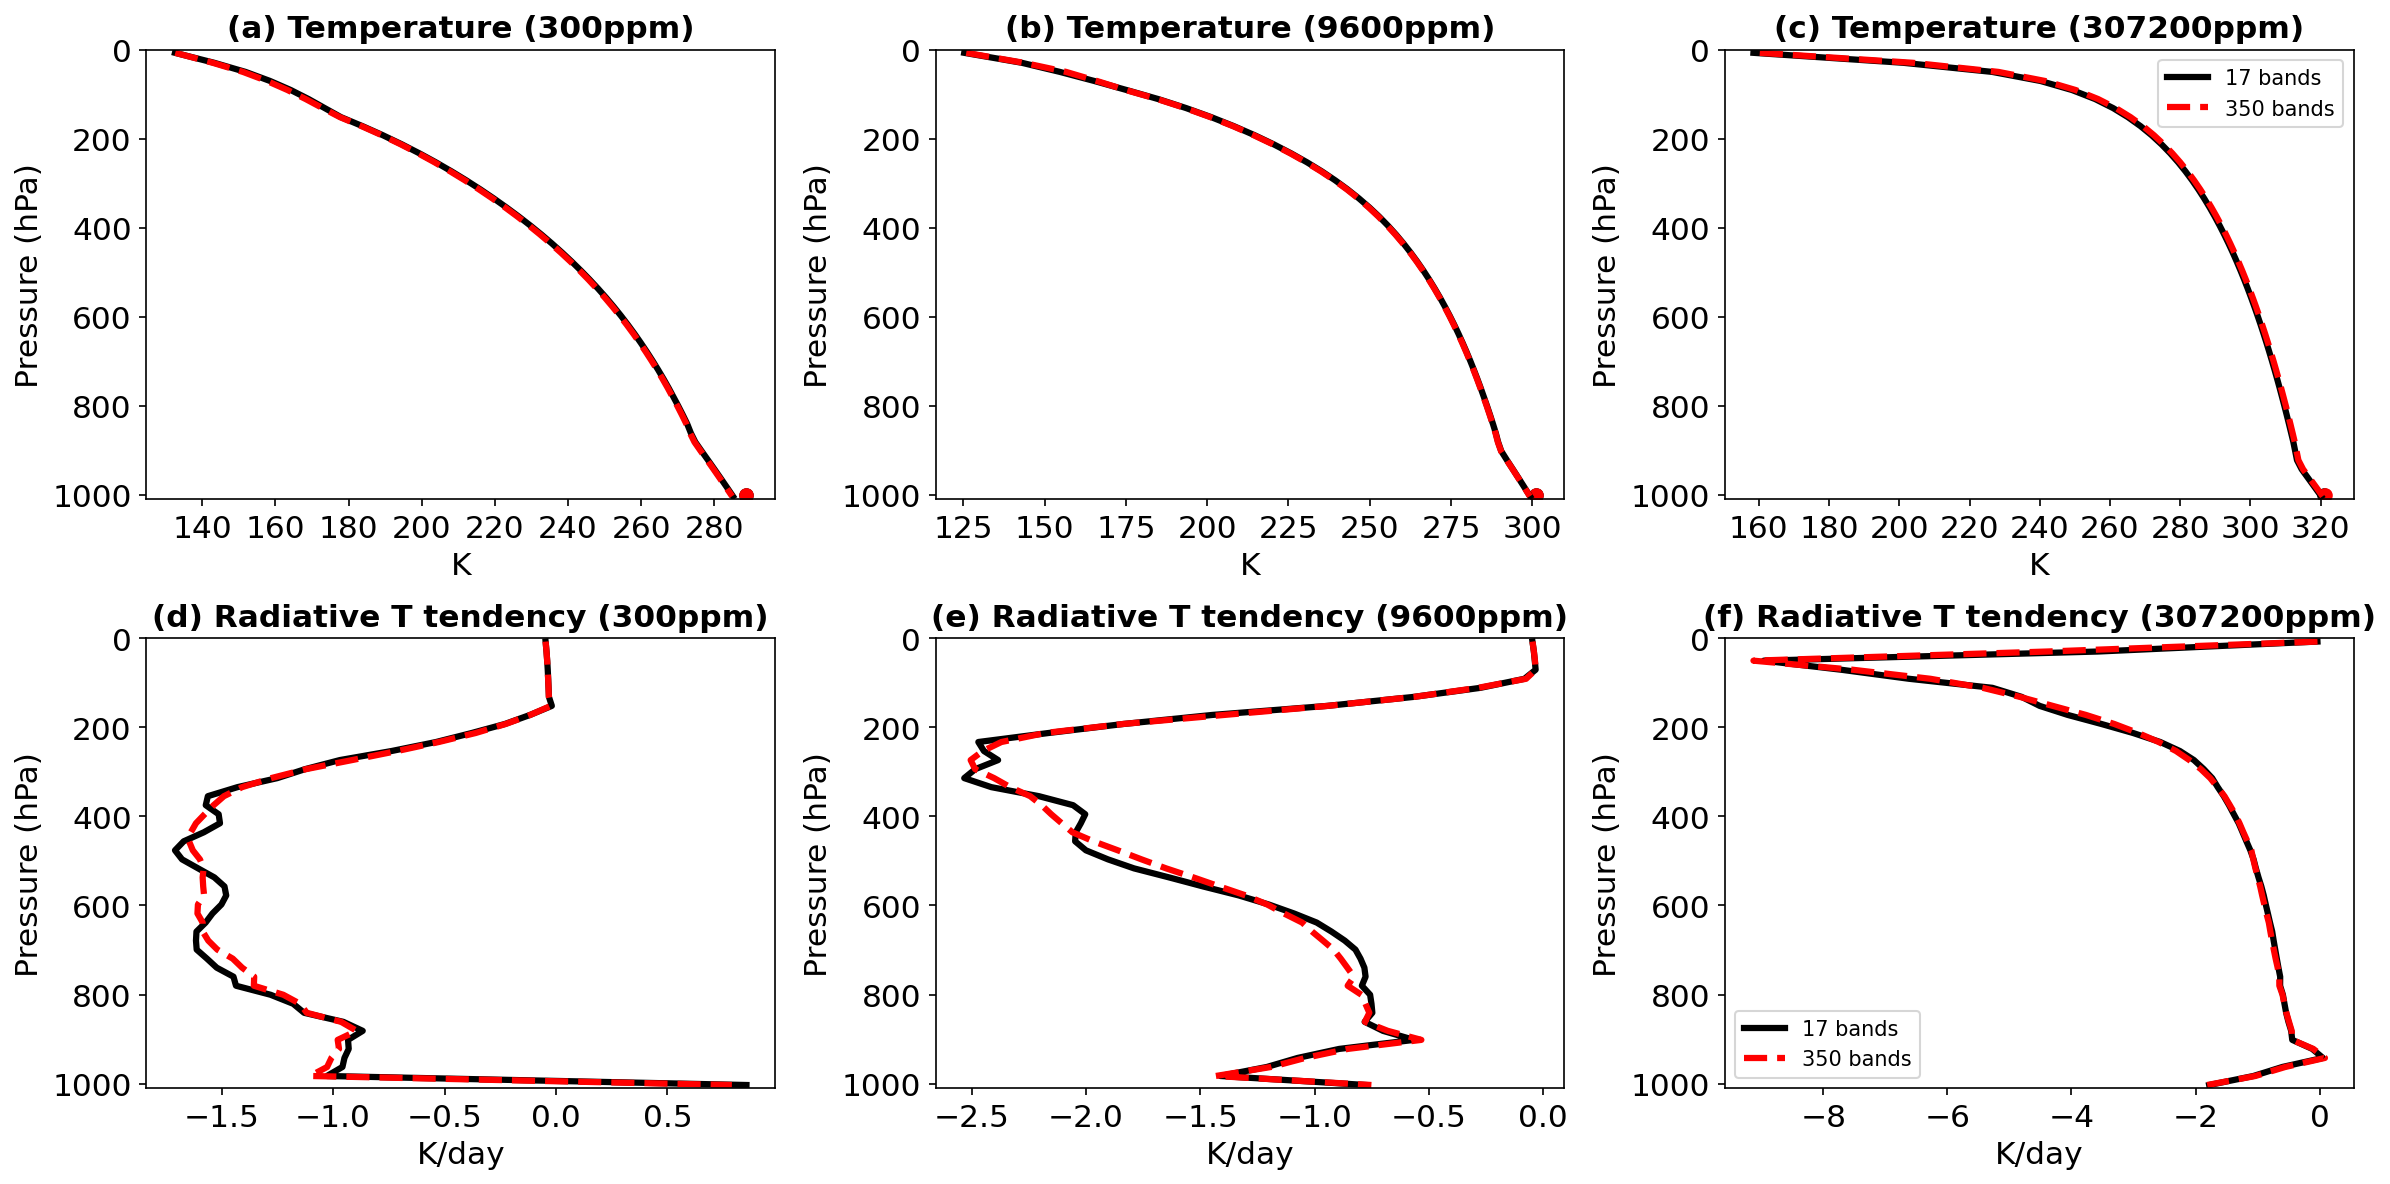

In [14]:
size=15
plt.figure(figsize=(16, 8),dpi=150)
plt.subplot(231)
col_300ppm_17.temp.mean('lat').plot(y='pfull',c='k',lw=3)
plt.scatter(col_300ppm_17.t_surf.mean('lat').values,1000,c='k')
col_300ppm_350.temp.mean('lat').plot(y='pfull',c='r',lw=3,ls='--')
plt.scatter(col_300ppm_350.t_surf.mean('lat').values,1000,c='r')
plt.ylim([1010,0])
plt.xlabel('K',fontsize=size)
plt.ylabel('Pressure (hPa)',fontsize=size)
plt.title('(a) Temperature (300ppm)',fontweight='bold',fontsize=size)
plt.xticks(fontsize=size)
plt.yticks(fontsize=size)
plt.subplot(232)
col_9600ppm_17.temp.mean('lat').plot(y='pfull',c='k',lw=3)
plt.scatter(col_9600ppm_17.t_surf.mean('lat').values,1000,c='k')
col_9600ppm_350.temp.mean('lat').plot(y='pfull',c='r',lw=3,ls='--')
plt.scatter(col_9600ppm_350.t_surf.mean('lat').values,1000,c='r')
plt.ylim([1010,0])
plt.xlabel('K',fontsize=size)
plt.ylabel('Pressure (hPa)',fontsize=size)
plt.title('(b) Temperature (9600ppm)',fontweight='bold',fontsize=size)
plt.xticks(fontsize=size)
plt.yticks(fontsize=size)
plt.subplot(233)
col_307200ppm_17.temp.mean('lat').plot(y='pfull',c='k',lw=3, label='17 bands')
plt.scatter(col_307200ppm_17.t_surf.mean('lat').values,1000,c='k')
col_307200ppm_350.temp.mean('lat').plot(y='pfull',c='r',lw=3,ls='--', label='350 bands')
plt.scatter(col_307200ppm_350.t_surf.mean('lat').values,1000,c='r')
plt.ylim([1010,0])
plt.xlabel('K',fontsize=size)
plt.ylabel('Pressure (hPa)',fontsize=size)
plt.title('(c) Temperature (307200ppm)',fontweight='bold',fontsize=size)
plt.xticks(fontsize=size)
plt.yticks(fontsize=size)
plt.legend()

plt.subplot(234)
(col_300ppm_17.soc_tdt_rad*3600*24).mean('lat').plot(y='pfull',c='k',lw=3)
(col_300ppm_350.soc_tdt_rad*3600*24).mean('lat').plot(y='pfull',c='r',lw=3,ls='--')
plt.ylim([1010,0])
plt.xlabel('K/day',fontsize=size)
plt.ylabel('Pressure (hPa)',fontsize=size)
plt.title('(d) Radiative T tendency (300ppm)',fontweight='bold',fontsize=size)
plt.xticks(fontsize=size)
plt.yticks(fontsize=size)
plt.subplot(235)
(col_9600ppm_17.soc_tdt_rad*3600*24).mean('lat').plot(y='pfull',c='k',lw=3)
(col_9600ppm_350.soc_tdt_rad*3600*24).mean('lat').plot(y='pfull',c='r',lw=3,ls='--')
plt.ylim([1010,0])
plt.xlabel('K/day',fontsize=size)
plt.ylabel('Pressure (hPa)',fontsize=size)
plt.title('(e) Radiative T tendency (9600ppm)',fontweight='bold',fontsize=size)
plt.xticks(fontsize=size)
plt.yticks(fontsize=size)
plt.subplot(236)
(col_307200ppm_17.soc_tdt_rad*3600*24).mean('lat').plot(y='pfull',c='k',lw=3,label='17 bands')
(col_307200ppm_350.soc_tdt_rad*3600*24).mean('lat').plot(y='pfull',c='r',lw=3,ls='--',label='350 bands')
plt.ylim([1010,0])
plt.xlabel('K/day',fontsize=size)
plt.ylabel('Pressure (hPa)',fontsize=size)
plt.title('(f) Radiative T tendency (307200ppm)',fontweight='bold',fontsize=size)
plt.xticks(fontsize=size)
plt.yticks(fontsize=size)
plt.legend()
plt.tight_layout()
plt.savefig('./figs/fig2.pdf')
plt.show()

In [15]:
def mass_streamfunction(data, a=6371.0e3, g=9.8):
    """Calculate the mass streamfunction for the atmosphere.
    Based on a vertical integral of the meridional wind.
    Ref: Physics of Climate, Peixoto & Oort, 1992.  p158.
    `a` is the radius of the planet (default Earth 6371km).
    `g` is surface gravity (default Earth 9.8m/s^2).
    Returns an xarray DataArray of mass streamfunction.
    """
    vbar = data.vcomp
    c = 2*np.pi*a*np.cos(vbar.lat*np.pi/180) / g
    # take a diff of half levels, and assign to pfull coordinates
    dp=xr.DataArray(data.phalf.diff('phalf').values*100, coords=[('pfull', data.pfull.values)])
    return c*np.cumsum(vbar*dp, axis=vbar.dims.index('pfull'))

def mse_flux(data):
    grav = 9.80  # Gravitational acceleration
    a = 6376.0e3  # Earth radius
    L = 2.500e6  # Latent heat of vaporisation
    
    coslat = np.cos(np.pi * data.lat/180.)
    dlat = (data.lat[1]-data.lat[0]) * np.pi/180. * a
    lon_int_fac = 2. * np.pi * a * coslat
    dp=5000./grav
    
    # Evaluate time/zonal mean upward radiative fluxes at the surface
#     data['rflux_surf'] = data.t_surf ** 4. * 5.67e-8 - data.soc_surf_flux_sw - data.soc_surf_flux_lw
    data['rflux_surf'] = - data.soc_surf_flux_sw + data.soc_surf_flux_lw
    # Evaluate downward radiative fluxes at the TOA
    data['rflux_toa'] = -data.soc_toa_sw + data.soc_olr
    
    Fnet_atmos = (data.flux_lhe + data.flux_t + data.rflux_surf + data.rflux_toa) * lon_int_fac # flux into atmos is flux in at top and bottom
    total_heat_flux = -Fnet_atmos.cumsum('lat') * dlat /10.**15
    
    Fnet_L = (data.flux_lhe - data.precipitation * L) * lon_int_fac # flux of LH is water into atmos from evaporation - out from precip. On condensation, energy is converted to dry energy in atmosphere
    water_flux = Fnet_L.cumsum('lat') * dlat /10.**15
    
    dry_static_flux = total_heat_flux - water_flux
    return [total_heat_flux, water_flux, dry_static_flux]

In [16]:
mask = (ctl_300.lat>-30) & (ctl_300.lat<30)

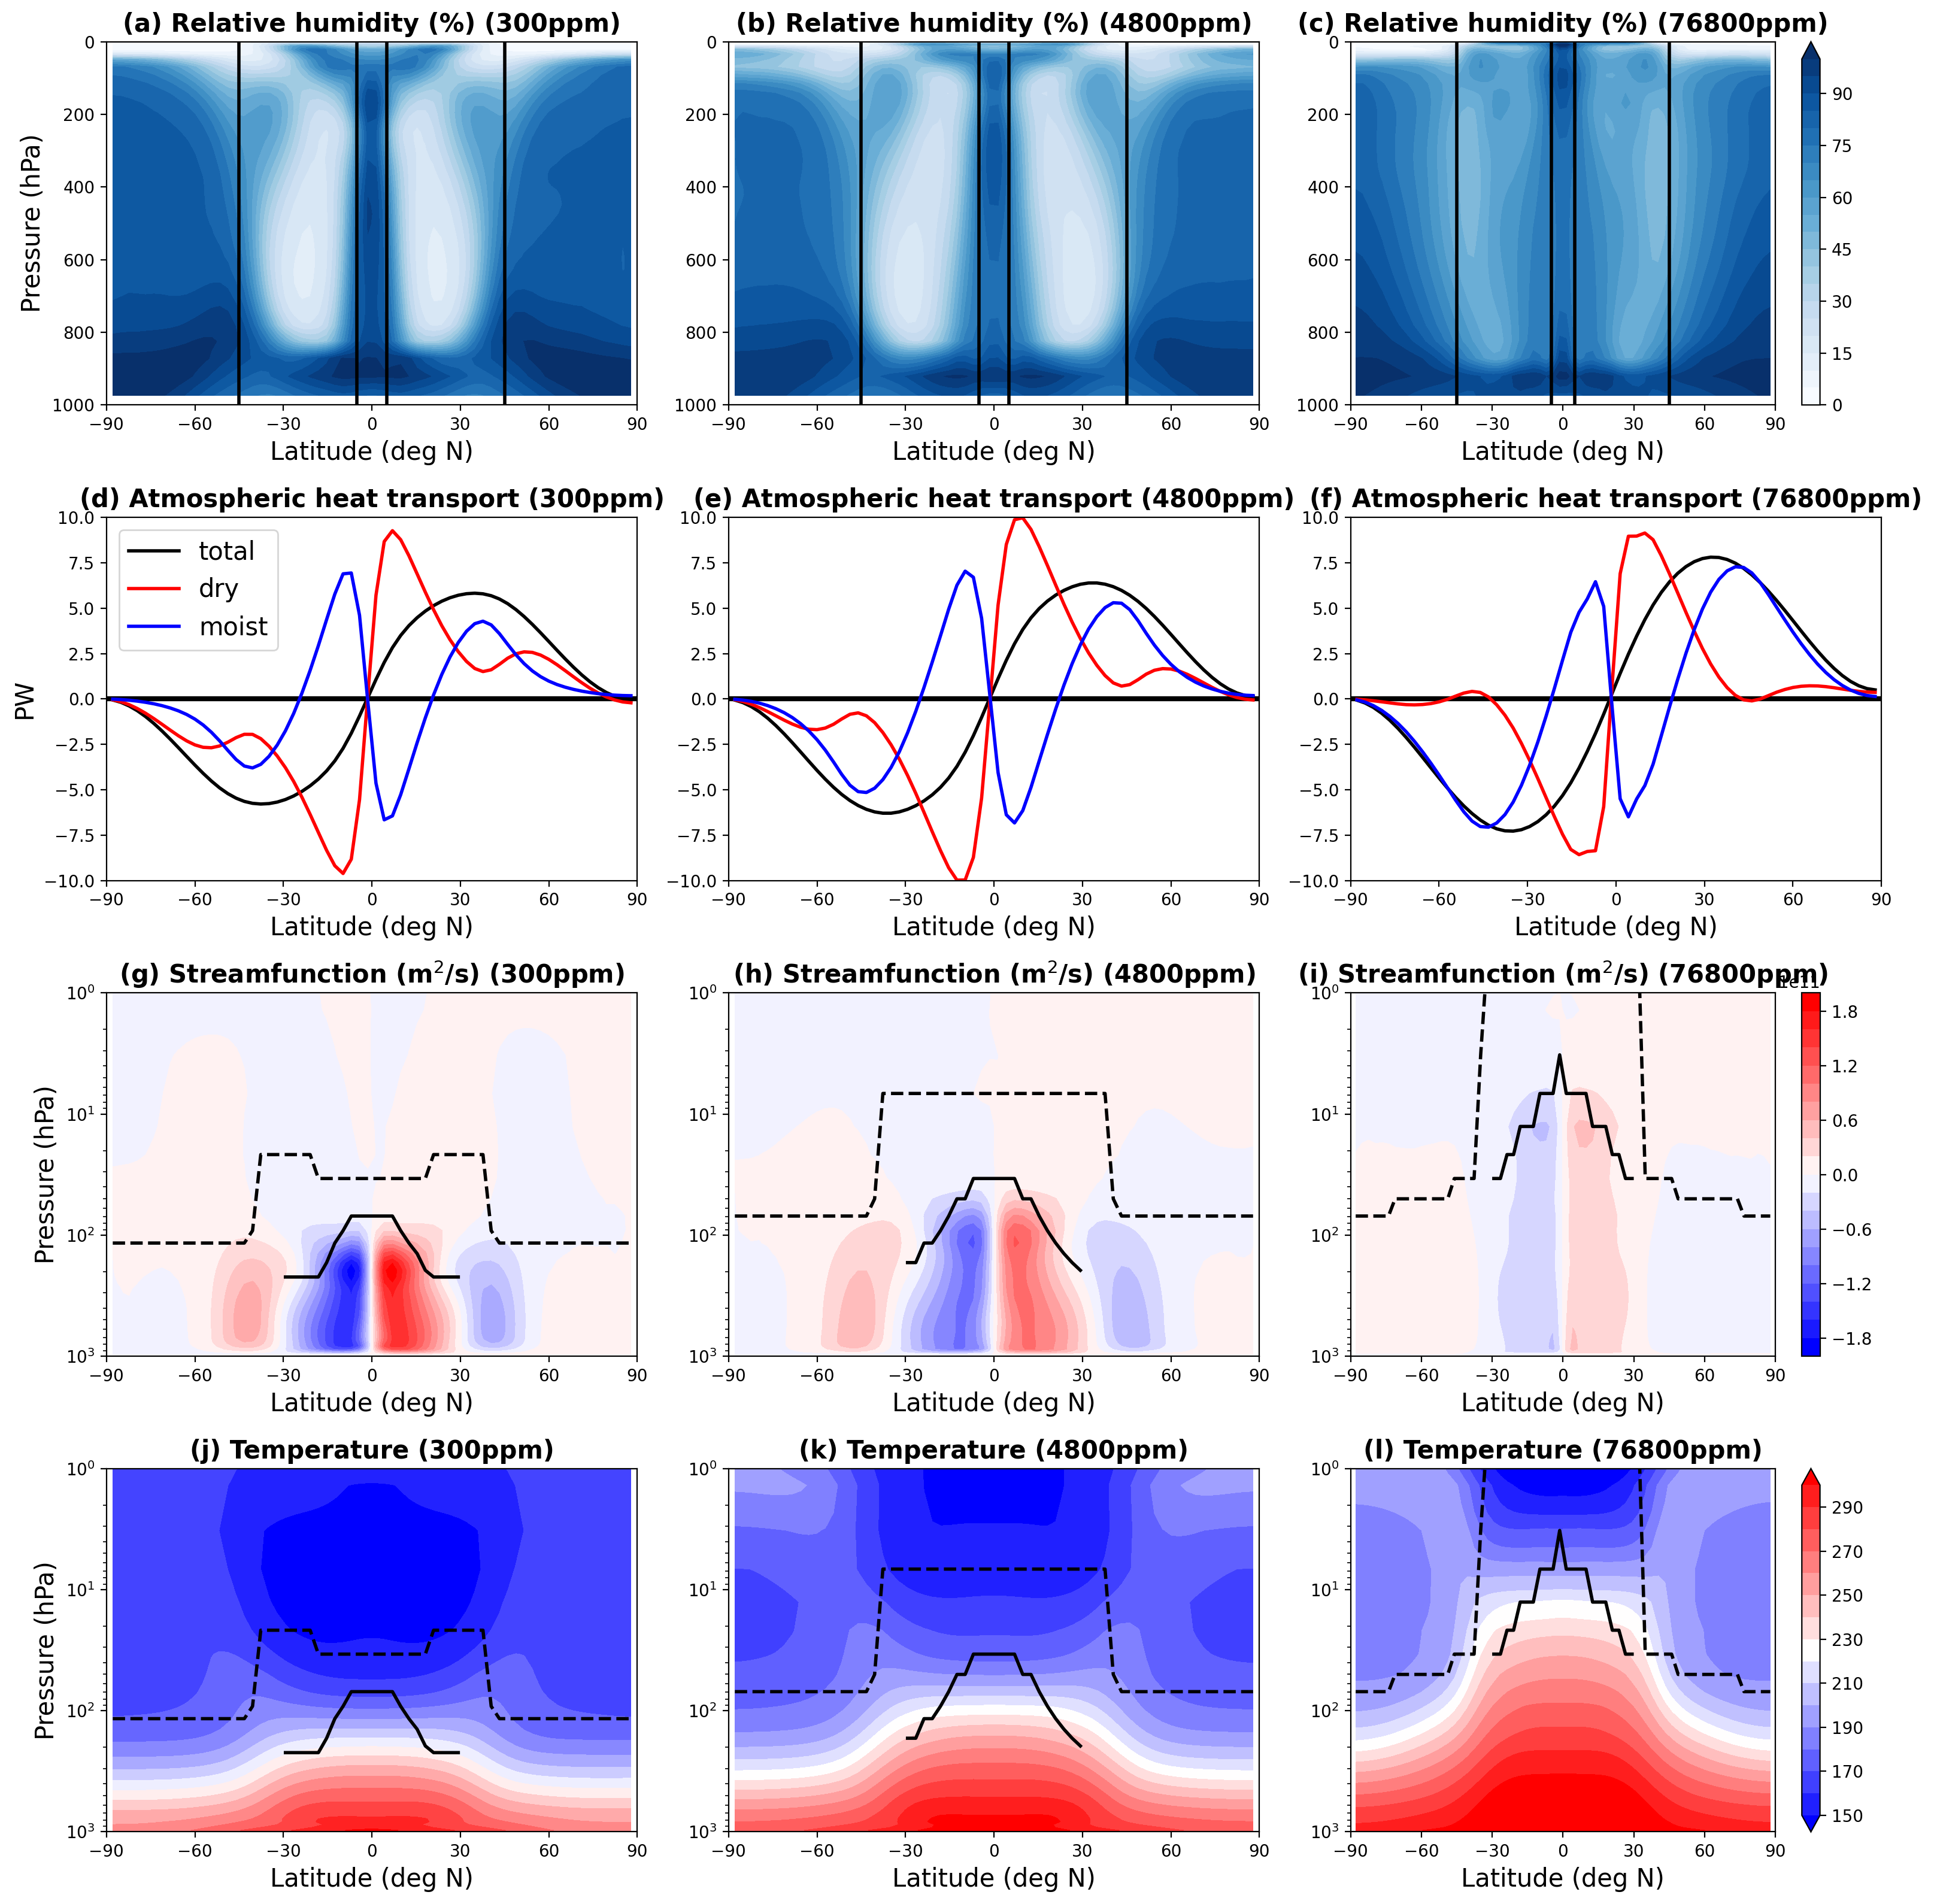

In [17]:
size=15
plt.figure(figsize=(16, 16),dpi=200)
plt.subplot(431)
ctl_300.rh.plot.contourf(levels=21,vmin=0,vmax=100,add_colorbar=False,cmap='Blues')
plt.ylim([1000,0])
plt.title('(a) Relative humidity (%) (300ppm)',fontweight='bold',fontsize=size)
plt.xlabel('Latitude (deg N)',fontsize=size)
plt.xticks(np.linspace(-90,90,7))
plt.xlim([-90,90])
plt.ylabel('Pressure (hPa)',fontsize=size)
plt.axvline(x=-45,c='k',lw=2)
plt.axvline(x=-5,c='k',lw=2)
plt.axvline(x=5,c='k',lw=2)
plt.axvline(x=45,c='k',lw=2)
plt.subplot(432)
ctl_4800.rh.plot.contourf(levels=21,vmin=0,vmax=100,add_colorbar=False,cmap='Blues')
plt.ylim([1000,0])
plt.title('(b) Relative humidity (%) (4800ppm)',fontweight='bold',fontsize=size)
plt.xlabel('Latitude (deg N)',fontsize=size)
plt.xticks(np.linspace(-90,90,7))
plt.xlim([-90,90])
plt.ylabel('')
plt.axvline(x=-45,c='k',lw=2)
plt.axvline(x=-5,c='k',lw=2)
plt.axvline(x=5,c='k',lw=2)
plt.axvline(x=45,c='k',lw=2)
plt.subplot(433)
ctl_76800.rh.plot.contourf(levels=21,vmin=0,vmax=100,add_labels=False,cmap='Blues')
plt.ylim([1000,0])
plt.title('(c) Relative humidity (%) (76800ppm)',fontweight='bold',fontsize=size)
plt.xlabel('Latitude (deg N)',fontsize=size)
plt.xticks(np.linspace(-90,90,7))
plt.xlim([-90,90])
plt.ylabel('')
plt.axvline(x=-45,c='k',lw=2)
plt.axvline(x=-5,c='k',lw=2)
plt.axvline(x=5,c='k',lw=2)
plt.axvline(x=45,c='k',lw=2)

[mse_300,moist_300,dry_300]=mse_flux(ctl_300)
[mse_4800,moist_4800,dry_4800]=mse_flux(ctl_4800)
[mse_76800,moist_76800,dry_76800]=mse_flux(ctl_76800)

plt.subplot(434)
plt.axhline(y=0,c='k',lw=3)
plt.plot(ctl_300.lat,mse_300.values,lw=2,label='total', c='k')
plt.plot(ctl_300.lat,dry_300.values,lw=2,label='dry', c='r')
plt.plot(ctl_300.lat,moist_300.values,lw=2,label='moist', c='b')
plt.legend(loc='best',fontsize=size)
plt.xlim([-90,90])
plt.ylim([-10,10])
plt.xticks(np.linspace(-90,90,7))
plt.xlabel('Latitude (deg N)',fontsize=size)
plt.ylabel('PW',fontsize=size)
plt.title('(d) Atmospheric heat transport (300ppm)',fontweight='bold',fontsize=size)
plt.subplot(435)
plt.axhline(y=0,c='k',lw=3)
plt.plot(ctl_300.lat,mse_4800.values,lw=2,label='total', c='k')
plt.plot(ctl_300.lat,dry_4800.values,lw=2,label='dry', c='r')
plt.plot(ctl_300.lat,moist_4800.values,lw=2,label='moist', c='b')
plt.xlim([-90,90])
plt.ylim([-10,10])
plt.xticks(np.linspace(-90,90,7))
plt.xlabel('Latitude (deg N)',fontsize=size)
plt.ylabel('')
plt.title('(e) Atmospheric heat transport (4800ppm)',fontweight='bold',fontsize=size)
plt.subplot(436)
plt.axhline(y=0,c='k',lw=3)
plt.plot(ctl_300.lat,mse_76800.values,lw=2,label='total', c='k')
plt.plot(ctl_300.lat,dry_76800.values,lw=2,label='dry', c='r')
plt.plot(ctl_300.lat,moist_76800.values,lw=2,label='moist', c='b')
plt.xlim([-90,90])
plt.ylim([-10,10])
plt.xticks(np.linspace(-90,90,7))
plt.xlabel('Latitude (deg N)',fontsize=size)
plt.ylabel('')
plt.title('(f) Atmospheric heat transport (76800ppm)',fontweight='bold',fontsize=size)

ms_300 = mass_streamfunction(ctl_300)
ms_4800 = mass_streamfunction(ctl_4800)
ms_76800 = mass_streamfunction(ctl_76800)
plt.subplot(437)
(ms_300).plot.contourf(y='pfull',cmap='bwr',levels=21,vmin=-2e11,vmax=2e11,add_colorbar=False)
plt.plot(ctl_300.lat,p_trop[:,0],lw=2,ls='--',c='k')
plt.plot(ctl_300.lat[mask],p_trop_conv[mask,0],lw=2,c='k')
plt.ylim([1000,1])
plt.yscale('log')
plt.xlabel('Latitude (deg N)',fontsize=size)
plt.xticks(np.linspace(-90,90,7))
plt.xlim([-90,90])
plt.ylabel('Pressure (hPa)',fontsize=size)
plt.title('(g) Streamfunction (m$^2$/s) (300ppm)',fontweight='bold',fontsize=size)
plt.subplot(438)
(ms_4800).plot.contourf(y='pfull',cmap='bwr',levels=21,vmin=-2e11,vmax=2e11,add_colorbar=False)
plt.plot(ctl_300.lat,p_trop[:,4],lw=2,ls='--',c='k')
plt.plot(ctl_300.lat[mask],p_trop_conv[mask,4],lw=2,c='k')
plt.ylim([1000,1])
plt.yscale('log')
plt.xlabel('Latitude (deg N)',fontsize=size)
plt.xticks(np.linspace(-90,90,7))
plt.xlim([-90,90])
plt.ylabel('')
plt.title('(h) Streamfunction (m$^2$/s) (4800ppm)',fontweight='bold',fontsize=size)
plt.subplot(439)
(ms_76800).plot.contourf(y='pfull',cmap='bwr',levels=21,vmin=-2e11,vmax=2e11,add_labels=False)
plt.plot(ctl_300.lat,p_trop[:,11],lw=2,ls='--',c='k')
plt.plot(ctl_300.lat[mask],p_trop_conv[mask,11],lw=2,c='k')
plt.ylim([1000,1])
plt.yscale('log')
plt.xlabel('Latitude (deg N)',fontsize=size)
plt.xticks(np.linspace(-90,90,7))
plt.xlim([-90,90])
plt.ylabel('')
plt.title('(i) Streamfunction (m$^2$/s) (76800ppm)',fontweight='bold',fontsize=size)

plt.subplot(4,3,10)
ctl_300.temp.plot.contourf(y='pfull',cmap='bwr',levels=16,vmin=150,vmax=300,add_colorbar=False)
plt.plot(ctl_300.lat,p_trop[:,0],lw=2,ls='--',c='k')
plt.plot(ctl_300.lat[mask],p_trop_conv[mask,0],lw=2,c='k')
plt.ylim([1000,1])
plt.yscale('log')
plt.xlabel('Latitude (deg N)',fontsize=size)
plt.xticks(np.linspace(-90,90,7))
plt.xlim([-90,90])
plt.ylabel('Pressure (hPa)',fontsize=size)
plt.title('(j) Temperature (300ppm)',fontweight='bold',fontsize=size)
plt.subplot(4,3,11)
ctl_4800.temp.plot.contourf(y='pfull',cmap='bwr',levels=16,vmin=150,vmax=300,add_colorbar=False)
plt.plot(ctl_300.lat,p_trop[:,4],lw=2,ls='--',c='k')
plt.plot(ctl_300.lat[mask],p_trop_conv[mask,4],lw=2,c='k')
plt.ylim([1000,1])
plt.yscale('log')
plt.xlabel('Latitude (deg N)',fontsize=size)
plt.xticks(np.linspace(-90,90,7))
plt.xlim([-90,90])
plt.ylabel('')
plt.title('(k) Temperature (4800ppm)',fontweight='bold',fontsize=size)
plt.subplot(4,3,12)
ctl_76800.temp.plot.contourf(y='pfull',cmap='bwr',levels=16,vmin=150,vmax=300,add_labels=False)
plt.plot(ctl_300.lat,p_trop[:,11],lw=2,ls='--',c='k')
plt.plot(ctl_300.lat[mask],p_trop_conv[mask,11],lw=2,c='k')
plt.ylim([1000,1])
plt.yscale('log')
plt.xlabel('Latitude (deg N)',fontsize=size)
plt.xticks(np.linspace(-90,90,7))
plt.xlim([-90,90])
plt.ylabel('')
plt.title('(l) Temperature (76800ppm)',fontweight='bold',fontsize=size)
plt.tight_layout()
plt.savefig('./figs/fig3.pdf')
plt.show()

In [18]:
rad_300 = xr.open_mfdataset(dir_data+'rad_300.nc')
rad_600 = xr.open_mfdataset(dir_data+'rad_600.nc')
rad_1200 = xr.open_mfdataset(dir_data+'rad_1200.nc')
rad_2400 = xr.open_mfdataset(dir_data+'rad_2400.nc')
rad_4800 = xr.open_mfdataset(dir_data+'rad_4800.nc')
rad_9600 = xr.open_mfdataset(dir_data+'rad_9600.nc')
rad_9600sqrt2 = xr.open_mfdataset(dir_data+'rad_9600sqrt2.nc')
rad_19200 = xr.open_mfdataset(dir_data+'rad_19200.nc')
rad_19200sqrt2 = xr.open_mfdataset(dir_data+'rad_19200sqrt2.nc')
rad_38400 = xr.open_mfdataset(dir_data+'rad_38400.nc')
rad_38400sqrt2 = xr.open_mfdataset(dir_data+'rad_38400sqrt2.nc')
rad_76800 = xr.open_mfdataset(dir_data+'rad_76800.nc')
rad_76800sqrt2 = xr.open_mfdataset(dir_data+'rad_76800sqrt2.nc')
forc_300 = xr.open_mfdataset(dir_data+'forc_300.nc')
forc_600 = xr.open_mfdataset(dir_data+'forc_600.nc')
forc_1200 = xr.open_mfdataset(dir_data+'forc_1200.nc')
forc_2400 = xr.open_mfdataset(dir_data+'forc_2400.nc')
forc_4800 = xr.open_mfdataset(dir_data+'forc_4800.nc')
forc_9600 = xr.open_mfdataset(dir_data+'forc_9600.nc')
forc_9600sqrt2 = xr.open_mfdataset(dir_data+'forc_9600sqrt2.nc')
forc_19200 = xr.open_mfdataset(dir_data+'forc_19200.nc')
forc_19200sqrt2 = xr.open_mfdataset(dir_data+'forc_19200sqrt2.nc')
forc_38400 = xr.open_mfdataset(dir_data+'forc_38400.nc')
forc_38400sqrt2 = xr.open_mfdataset(dir_data+'forc_38400sqrt2.nc')
forc_76800 = xr.open_mfdataset(dir_data+'forc_76800.nc')
delts_300 = xr.open_mfdataset(dir_data+'delts_300.nc')
delts_600 = xr.open_mfdataset(dir_data+'delts_600.nc')
delts_1200 = xr.open_mfdataset(dir_data+'delts_1200.nc')
delts_2400 = xr.open_mfdataset(dir_data+'delts_2400.nc')
delts_4800 = xr.open_mfdataset(dir_data+'delts_4800.nc')
delts_9600 = xr.open_mfdataset(dir_data+'delts_9600.nc')
delts_9600sqrt2 = xr.open_mfdataset(dir_data+'delts_9600sqrt2.nc')
delts_19200 = xr.open_mfdataset(dir_data+'delts_19200.nc')
delts_19200sqrt2 = xr.open_mfdataset(dir_data+'delts_19200sqrt2.nc')
delts_38400 = xr.open_mfdataset(dir_data+'delts_38400.nc')
delts_38400sqrt2 = xr.open_mfdataset(dir_data+'delts_38400sqrt2.nc')
delts_76800 = xr.open_mfdataset(dir_data+'delts_76800.nc')
delta_300 = xr.open_mfdataset(dir_data+'delta_300.nc')
delta_600 = xr.open_mfdataset(dir_data+'delta_600.nc')
delta_1200 = xr.open_mfdataset(dir_data+'delta_1200.nc')
delta_2400 = xr.open_mfdataset(dir_data+'delta_2400.nc')
delta_4800 = xr.open_mfdataset(dir_data+'delta_4800.nc')
delta_9600 = xr.open_mfdataset(dir_data+'delta_9600.nc')
delta_9600sqrt2 = xr.open_mfdataset(dir_data+'delta_9600sqrt2.nc')
delta_19200 = xr.open_mfdataset(dir_data+'delta_19200.nc')
delta_19200sqrt2 = xr.open_mfdataset(dir_data+'delta_19200sqrt2.nc')
delta_38400 = xr.open_mfdataset(dir_data+'delta_38400.nc')
delta_38400sqrt2 = xr.open_mfdataset(dir_data+'delta_38400sqrt2.nc')
delta_76800 = xr.open_mfdataset(dir_data+'delta_76800.nc')
delsh_300 = xr.open_mfdataset(dir_data+'delsh_300.nc')
delsh_600 = xr.open_mfdataset(dir_data+'delsh_600.nc')
delsh_1200 = xr.open_mfdataset(dir_data+'delsh_1200.nc')
delsh_2400 = xr.open_mfdataset(dir_data+'delsh_2400.nc')
delsh_4800 = xr.open_mfdataset(dir_data+'delsh_4800.nc')
delsh_9600 = xr.open_mfdataset(dir_data+'delsh_9600.nc')
delsh_9600sqrt2 = xr.open_mfdataset(dir_data+'delsh_9600sqrt2.nc')
delsh_19200 = xr.open_mfdataset(dir_data+'delsh_19200.nc')
delsh_19200sqrt2 = xr.open_mfdataset(dir_data+'delsh_19200sqrt2.nc')
delsh_38400 = xr.open_mfdataset(dir_data+'delsh_38400.nc')
delsh_38400sqrt2 = xr.open_mfdataset(dir_data+'delsh_38400sqrt2.nc')
delsh_76800 = xr.open_mfdataset(dir_data+'delsh_76800.nc')
delsh_rh300_300 = xr.open_mfdataset(dir_data+'delsh_rh300_300.nc')
delsh_rh300_600 = xr.open_mfdataset(dir_data+'delsh_rh300_600.nc')
delsh_rh300_1200 = xr.open_mfdataset(dir_data+'delsh_rh300_1200.nc')
delsh_rh300_2400 = xr.open_mfdataset(dir_data+'delsh_rh300_2400.nc')
delsh_rh300_4800 = xr.open_mfdataset(dir_data+'delsh_rh300_4800.nc')
delsh_rh300_9600 = xr.open_mfdataset(dir_data+'delsh_rh300_9600.nc')
delsh_rh300_9600sqrt2 = xr.open_mfdataset(dir_data+'delsh_rh300_9600sqrt2.nc')
delsh_rh300_19200 = xr.open_mfdataset(dir_data+'delsh_rh300_19200.nc')
delsh_rh300_19200sqrt2 = xr.open_mfdataset(dir_data+'delsh_rh300_19200sqrt2.nc')
delsh_rh300_38400 = xr.open_mfdataset(dir_data+'delsh_rh300_38400.nc')
delsh_rh300_38400sqrt2 = xr.open_mfdataset(dir_data+'delsh_rh300_38400sqrt2.nc')
delsh_rh300_76800 = xr.open_mfdataset(dir_data+'delsh_rh300_76800.nc')
cteco2_300 = xr.open_mfdataset(dir_data+'cteco2_300.nc')
cteco2_600 = xr.open_mfdataset(dir_data+'cteco2_600.nc')
cteco2_1200 = xr.open_mfdataset(dir_data+'cteco2_1200.nc')
cteco2_2400 = xr.open_mfdataset(dir_data+'cteco2_2400.nc')
cteco2_4800 = xr.open_mfdataset(dir_data+'cteco2_4800.nc')
cteco2_9600 = xr.open_mfdataset(dir_data+'cteco2_9600.nc')
cteco2_9600sqrt2 = xr.open_mfdataset(dir_data+'cteco2_9600sqrt2.nc')
cteco2_19200 = xr.open_mfdataset(dir_data+'cteco2_19200.nc')
cteco2_19200sqrt2 = xr.open_mfdataset(dir_data+'cteco2_19200sqrt2.nc')
cteco2_38400 = xr.open_mfdataset(dir_data+'cteco2_38400.nc')
cteco2_38400sqrt2 = xr.open_mfdataset(dir_data+'cteco2_38400sqrt2.nc')
cteco2_76800 = xr.open_mfdataset(dir_data+'cteco2_76800.nc')

In [19]:
rad_arr = [rad_300,rad_600,rad_1200,rad_2400,rad_4800,rad_9600,rad_9600sqrt2,rad_19200,rad_19200sqrt2,rad_38400,rad_38400sqrt2,rad_76800,rad_76800sqrt2]
forc_arr = [forc_300,forc_600,forc_1200,forc_2400,forc_4800,forc_9600,forc_9600sqrt2,forc_19200,forc_19200sqrt2,forc_38400,forc_38400sqrt2,forc_76800]
delts_arr = [delts_300,delts_600,delts_1200,delts_2400,delts_4800,delts_9600,delts_9600sqrt2,delts_19200,delts_19200sqrt2,delts_38400,delts_38400sqrt2,delts_76800]
delta_arr = [delta_300,delta_600,delta_1200,delta_2400,delta_4800,delta_9600,delta_9600sqrt2,delta_19200,delta_19200sqrt2,delta_38400,delta_38400sqrt2,delta_76800]
delsh_arr = [delsh_300,delsh_600,delsh_1200,delsh_2400,delsh_4800,delsh_9600,delsh_9600sqrt2,delsh_19200,delsh_19200sqrt2,delsh_38400,delsh_38400sqrt2,delsh_76800]
delsh_rh300_arr = [delsh_rh300_300,delsh_rh300_600,delsh_rh300_1200,delsh_rh300_2400,delsh_rh300_4800,delsh_rh300_9600,delsh_rh300_9600sqrt2,delsh_rh300_19200,delsh_rh300_19200sqrt2,delsh_rh300_38400,delsh_rh300_38400sqrt2,delsh_rh300_76800]
cteco2_arr = [cteco2_300,cteco2_600,cteco2_1200,cteco2_2400,cteco2_4800,cteco2_9600,cteco2_9600sqrt2,cteco2_19200,cteco2_19200sqrt2,cteco2_38400,cteco2_38400sqrt2,cteco2_76800]

In [20]:
forc = np.zeros(len(rad_arr)-1)
sw = np.zeros(len(rad_arr)-1)
f_delts_arr = np.zeros(len(rad_arr)-1)
f_delta_arr = np.zeros(len(rad_arr)-1)
f_delsh_arr = np.zeros(len(rad_arr)-1)
f_delsh_rh300_arr = np.zeros(len(rad_arr)-1)

for i in range(len(rad_arr)-1):
    sw[i] = (rad_arr[i+1]-rad_arr[i]).soc_toa_sw.weighted(weights).mean(('lat')).values
    f_delts_arr[i]=delts_arr[i].soc_olr.weighted(weights).mean(('lat')).values-rad_arr[i].soc_olr.weighted(weights).mean(('lat')).values
    f_delta_arr[i]=delta_arr[i].soc_olr.weighted(weights).mean(('lat')).values-rad_arr[i].soc_olr.weighted(weights).mean(('lat')).values
    f_delsh_arr[i]=delsh_arr[i].soc_olr.weighted(weights).mean(('lat')).values-rad_arr[i].soc_olr.weighted(weights).mean(('lat')).values
    f_delsh_rh300_arr[i]=delsh_rh300_arr[i].soc_olr.weighted(weights).mean(('lat')).values-rad_arr[i].soc_olr.weighted(weights).mean(('lat')).values
    forc[i]= rad_arr[i].soc_olr.weighted(weights).mean(('lat')).values-forc_arr[i].soc_olr.weighted(weights).mean(('lat')).values
    if i>4: 
        forc[i]=forc[i]*2
        sw[i] = sw[i]*2
        f_delts_arr[i]=f_delts_arr[i]*2
        f_delta_arr[i]=f_delta_arr[i]*2
        f_delsh_arr[i]=f_delsh_arr[i]*2
        f_delsh_rh300_arr[i]=f_delsh_rh300_arr[i]*2

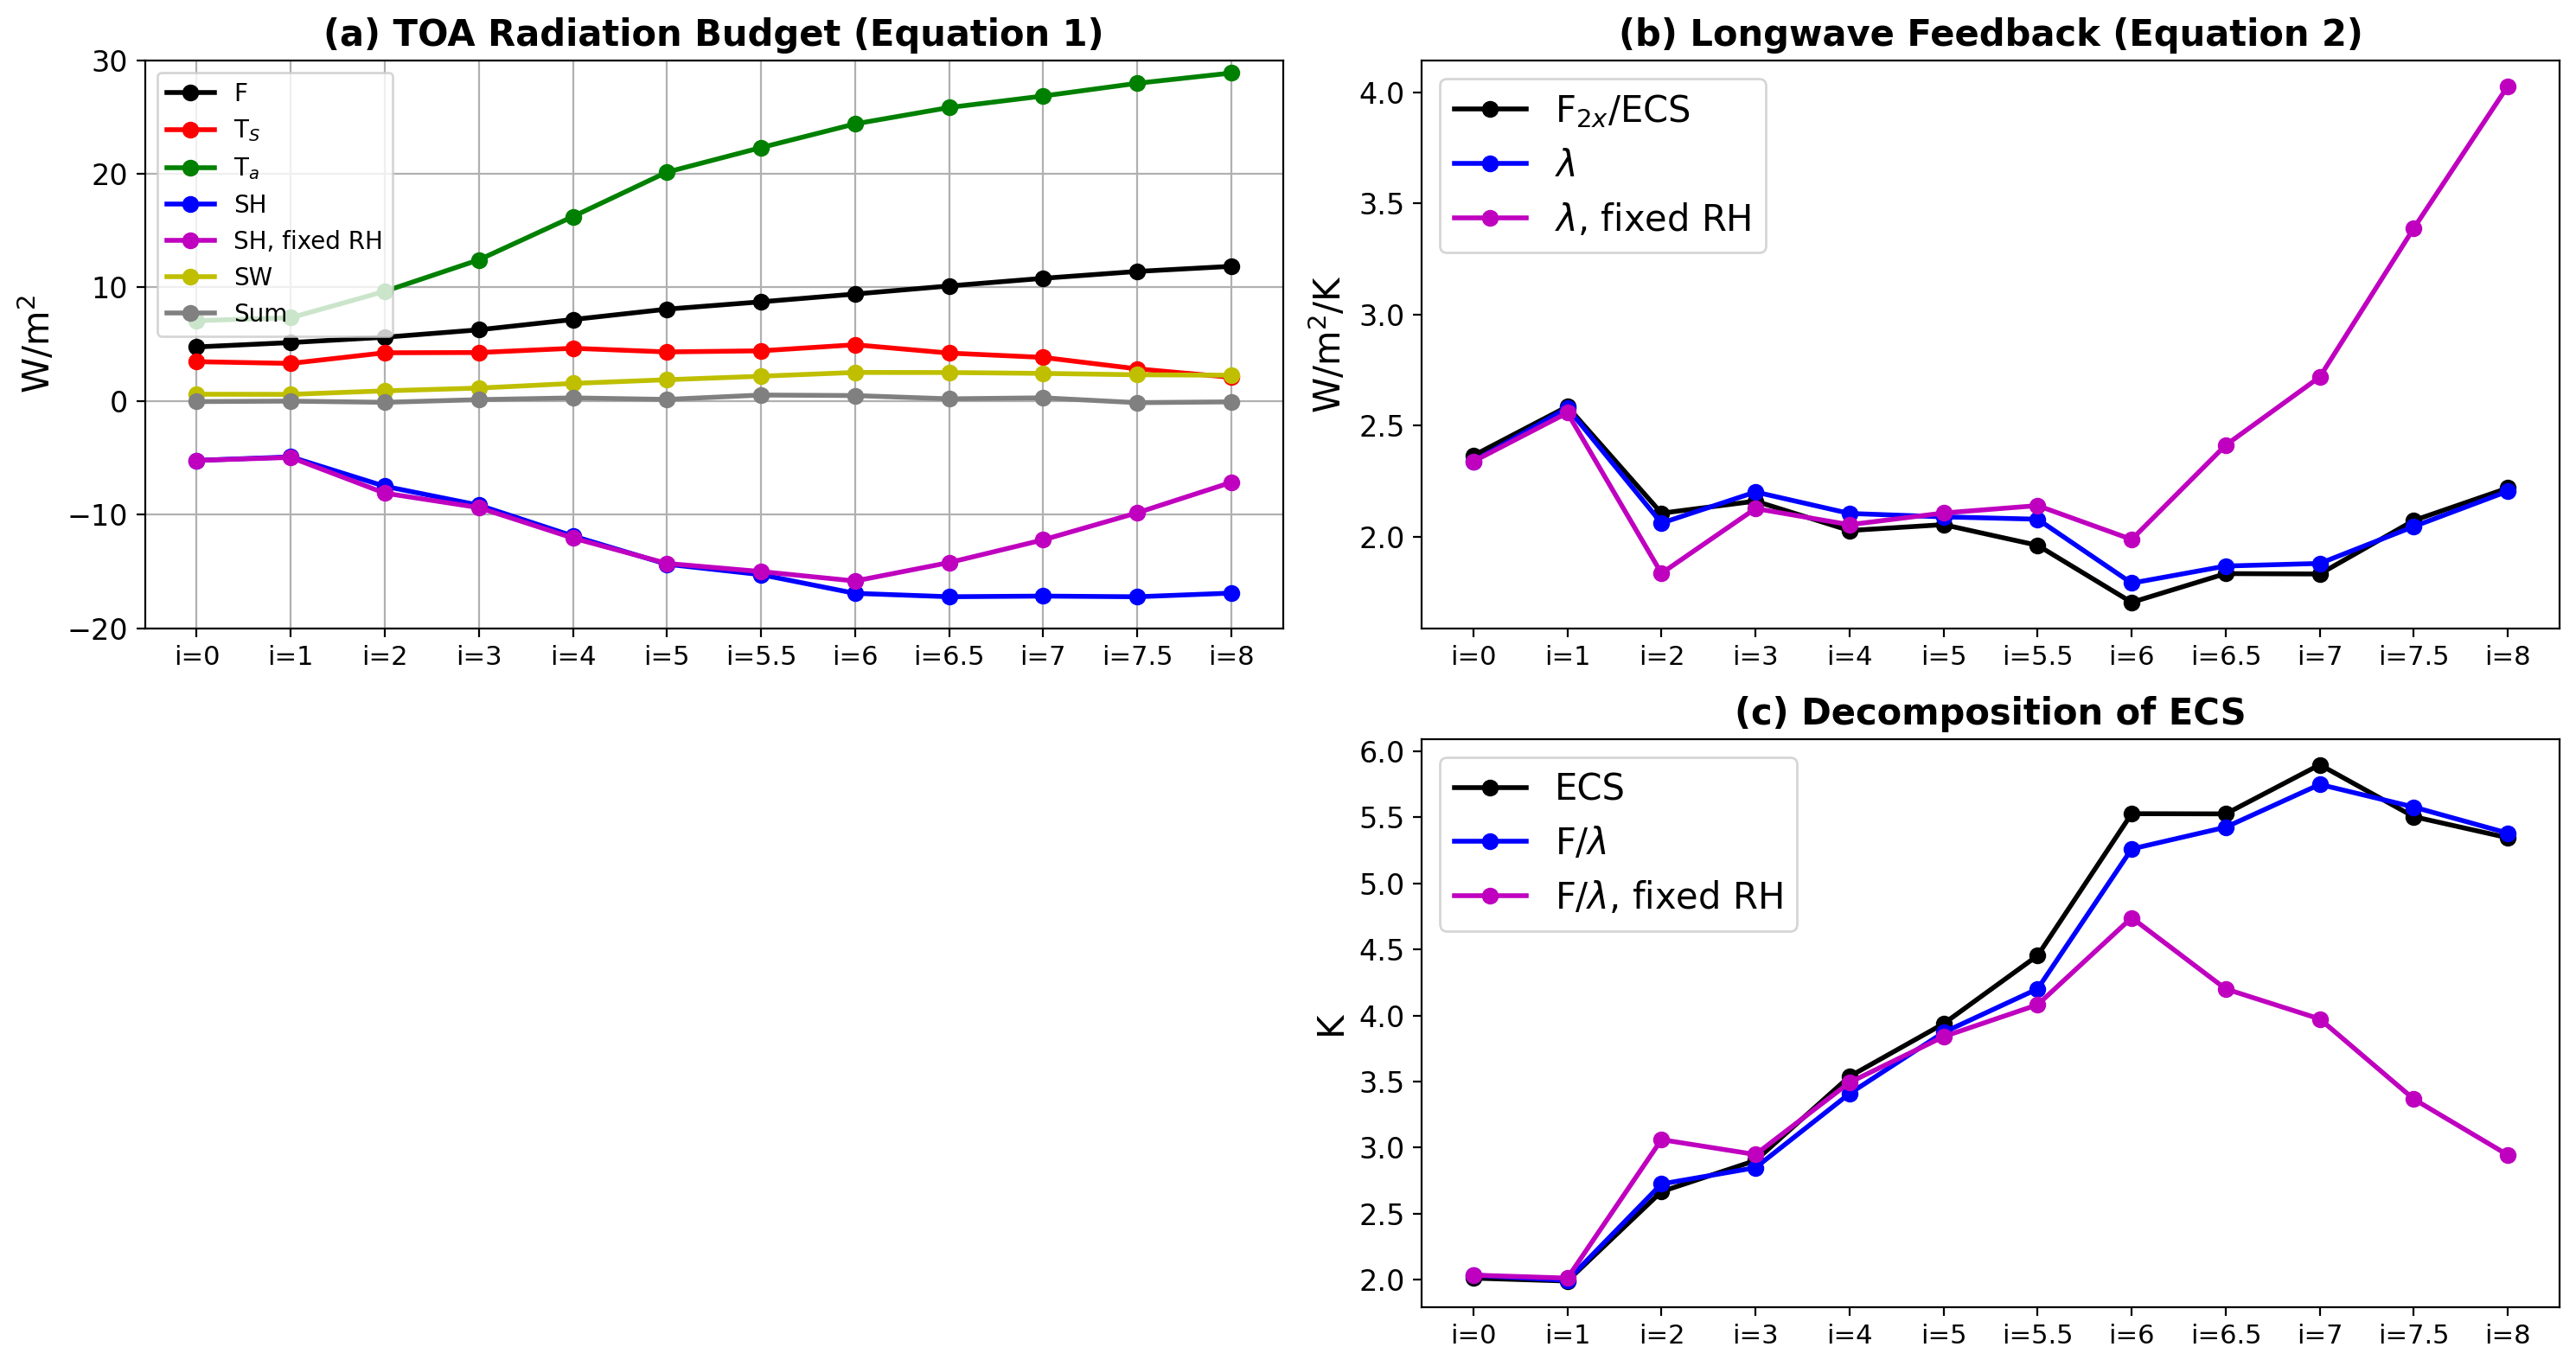

In [21]:
size=15

plt.figure(figsize=(15, 8),dpi=200)
plt.subplot(221)
plt.plot(forc,'-o',c='k',lw=2,label='F')
plt.plot(f_delts_arr,'-o',c='r',lw=2,label='T$_S$')
plt.plot(f_delta_arr,'-o',c='g',lw=2,label='T$_a$')
plt.plot(f_delsh_arr,'-o',c='b',lw=2,label='SH')
plt.plot(f_delsh_rh300_arr,'-o',c='m',lw=2,label='SH, fixed RH')
plt.plot(sw,'-o',c='y',lw=2,label='SW')
plt.plot(-forc+f_delts_arr+f_delta_arr+f_delsh_arr-sw,'-o',c='grey',lw=2,label='Sum')
label_2 = ['i=0','i=1','i=2','i=3','i=4','i=5','i=5.5','i=6','i=6.5','i=7','i=7.5','i=8']
plt.grid()
plt.xticks(np.arange(12),label_2,fontsize=11,rotation=0)
plt.yticks(fontsize=12)
plt.ylabel('W/m$^2$',fontsize=size)
plt.ylim([-20,30])
plt.title('(a) TOA Radiation Budget (Equation 1)',fontsize=size,fontweight='bold')
plt.legend(fontsize=10)

plt.subplot(222)
plt.plot(forc/dTs,'-o',c='k',lw=2,label='F$_{2x}$/ECS')
plt.plot((f_delts_arr+f_delta_arr+f_delsh_arr-sw)/dTs,'-o',c='b',lw=2,label='$\lambda$')
plt.plot((f_delts_arr+f_delta_arr+f_delsh_rh300_arr-sw)/dTs,'-o',c='m',lw=2,label='$\lambda$, fixed RH')
plt.ylabel('W/m$^2$/K',fontsize=size)
plt.xticks(np.arange(12),label_2,fontsize=11,rotation=0)
plt.yticks(fontsize=12)
plt.legend(fontsize=size)
plt.title('(b) Longwave Feedback (Equation 2)',fontsize=size,fontweight='bold')

plt.subplot(224)
plt.plot(dTs,'-o',lw=2,c='k',label='ECS')
plt.plot(forc/((f_delts_arr+f_delta_arr+f_delsh_arr-sw)/dTs),'-o',lw=2,c='b',label='F/$\lambda$')
plt.plot(forc/((f_delts_arr+f_delta_arr+f_delsh_rh300_arr-sw)/dTs),'-o',lw=2,c='m',label='F/$\lambda$, fixed RH')
plt.ylabel('K',fontsize=size)
plt.xticks(np.arange(12),label_2,fontsize=11,rotation=0)
plt.yticks(fontsize=12)
plt.legend(fontsize=size,loc='best')
plt.title('(c) Decomposition of ECS',fontsize=size,fontweight='bold')
plt.tight_layout()
plt.savefig('./figs/fig4.pdf')
plt.show()

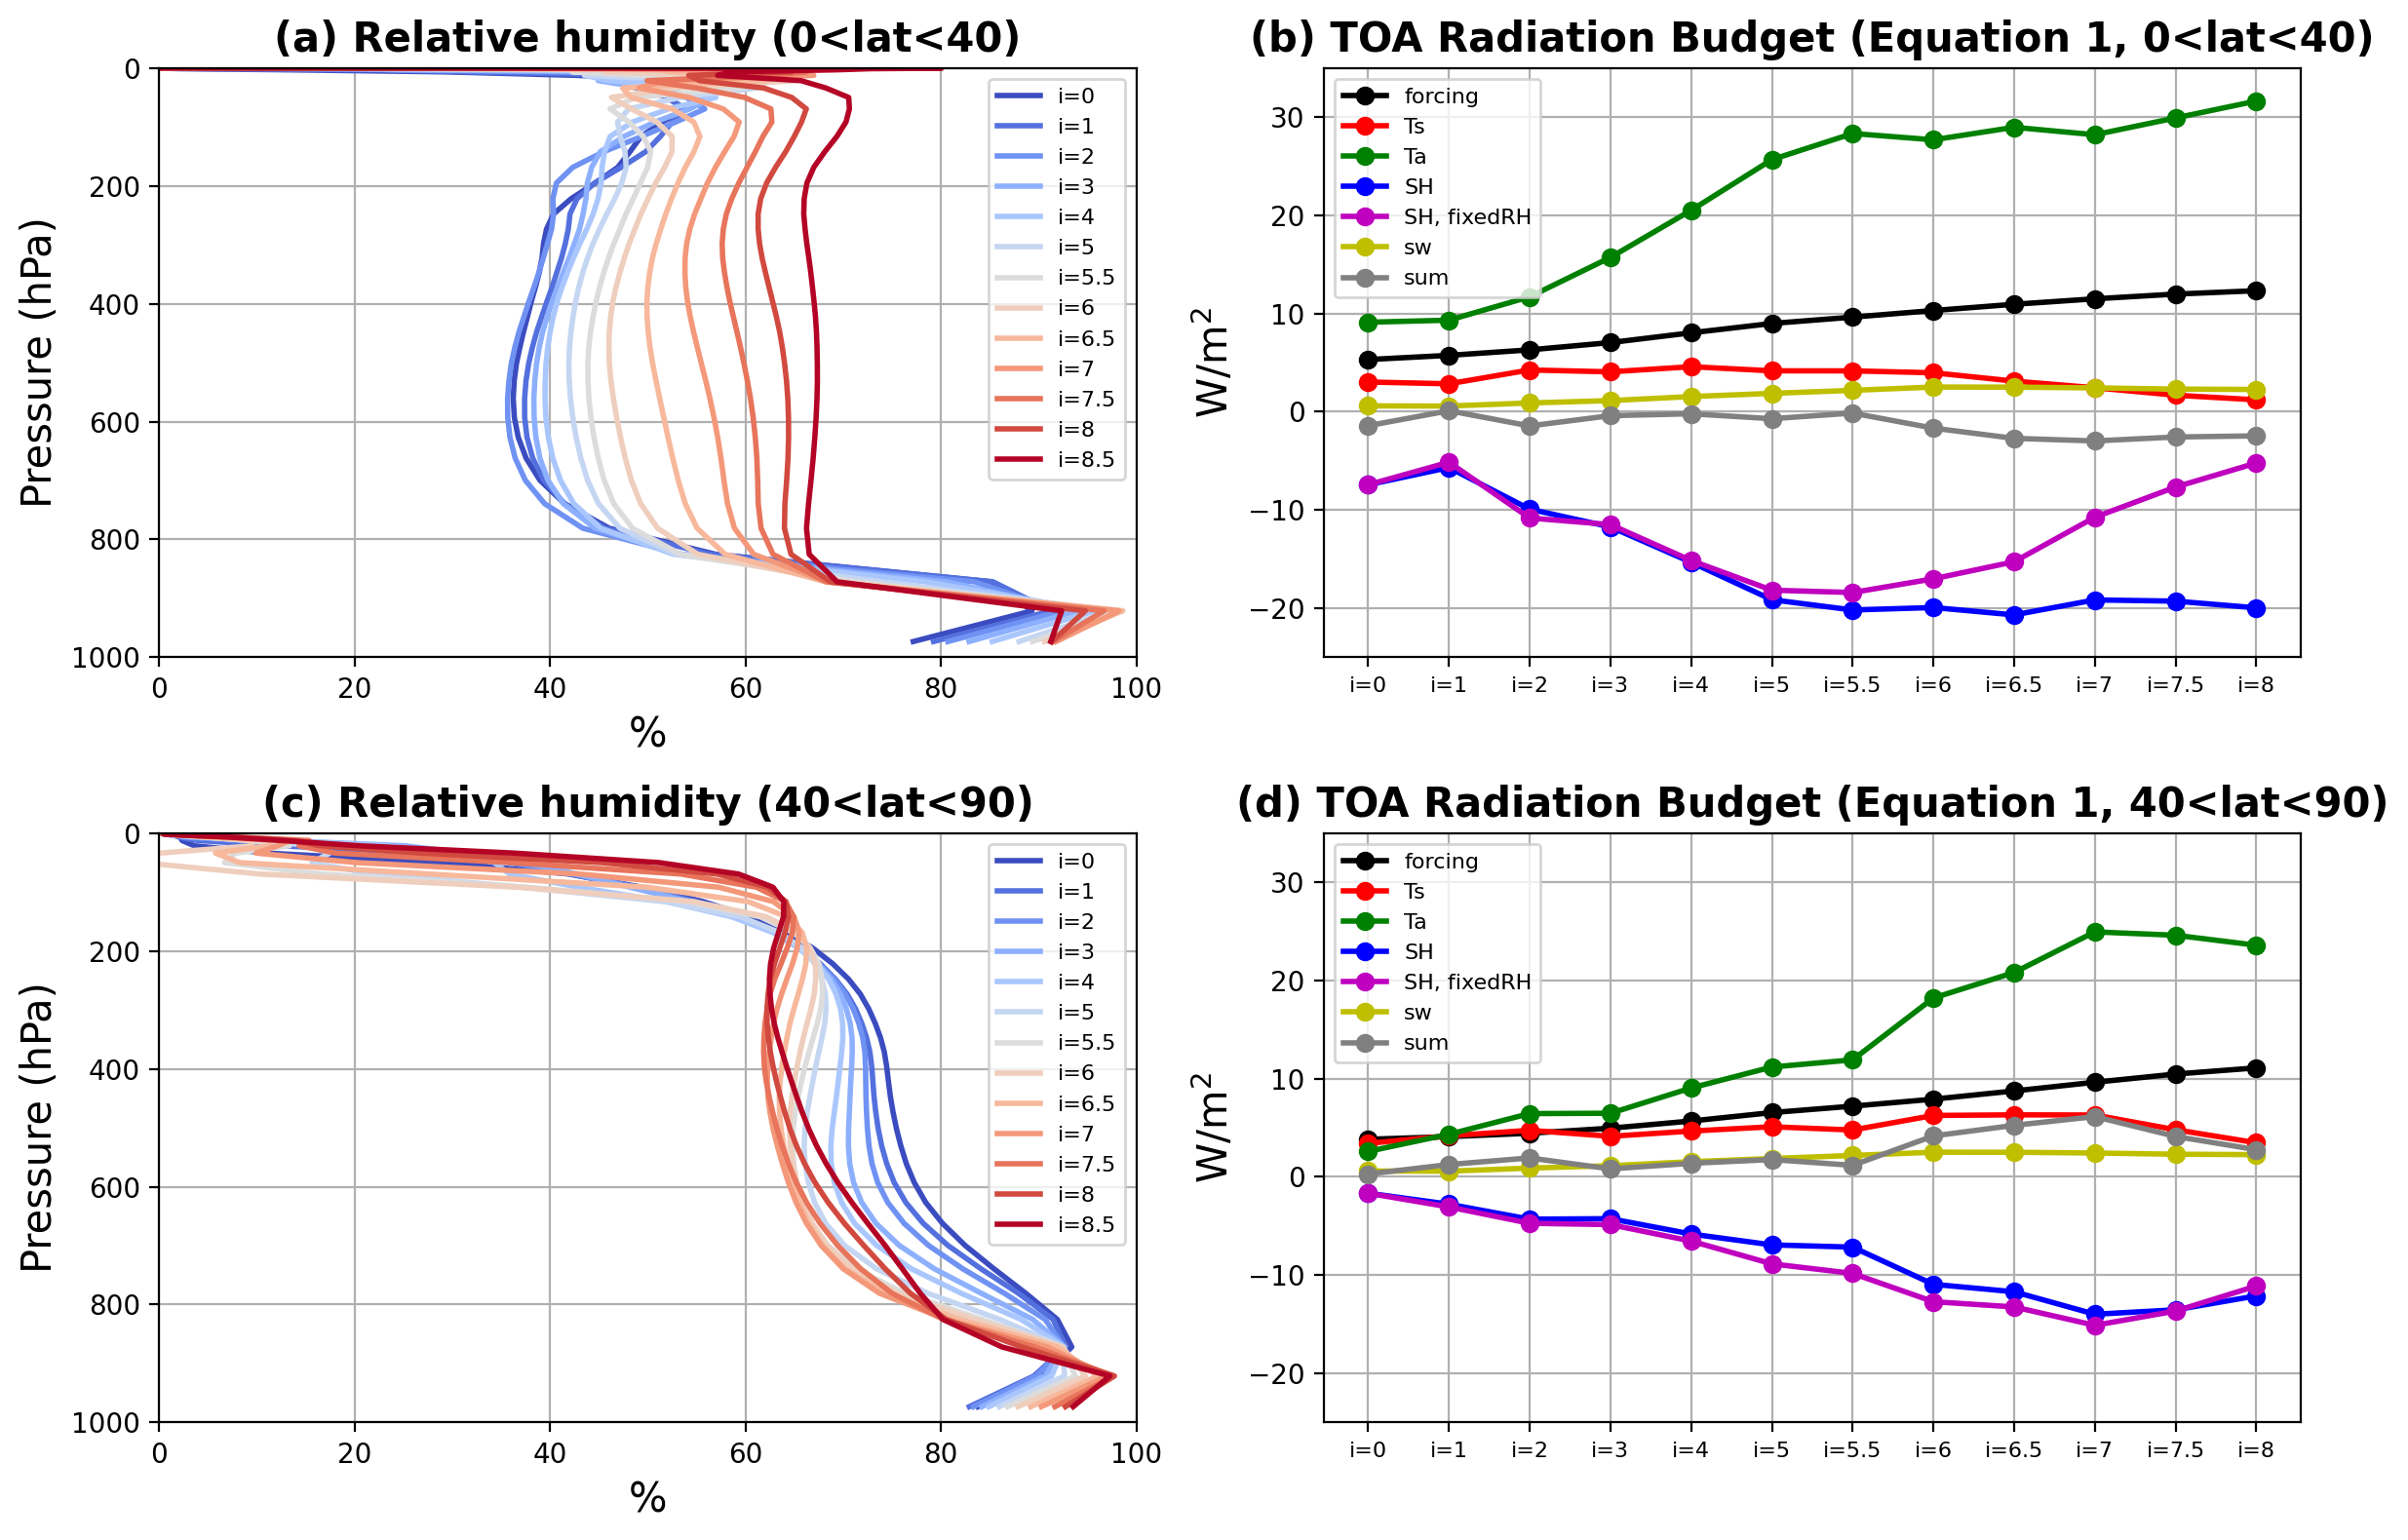

In [22]:
latmin=0
latmax=40

forc_lat = np.zeros(len(rad_arr)-1)
sw_lat = np.zeros(len(rad_arr)-1)
f_delts_arr_lat = np.zeros(len(rad_arr)-1)
f_delta_arr_lat = np.zeros(len(rad_arr)-1)
f_delsh_arr_lat = np.zeros(len(rad_arr)-1)
f_delsh_rh300_arr_lat = np.zeros(len(rad_arr)-1)
f_cteco2_arr_lat = np.zeros(len(rad_arr)-1)

for i in range(len(rad_arr)-1):
    sw_lat[i] = (rad_arr[i+1]-rad_arr[i]).soc_toa_sw.sel(lat=slice(latmin,latmax)).weighted(weights).mean(('lat')).values
    f_delts_arr_lat[i]=delts_arr[i].soc_olr.sel(lat=slice(latmin,latmax)).weighted(weights).mean(('lat')).values-rad_arr[i].soc_olr.sel(lat=slice(latmin,latmax)).weighted(weights).mean(('lat')).values
    f_delta_arr_lat[i]=delta_arr[i].soc_olr.sel(lat=slice(latmin,latmax)).weighted(weights).mean(('lat')).values-rad_arr[i].soc_olr.sel(lat=slice(latmin,latmax)).weighted(weights).mean(('lat')).values
    f_delsh_arr_lat[i]=delsh_arr[i].soc_olr.sel(lat=slice(latmin,latmax)).weighted(weights).mean(('lat')).values-rad_arr[i].soc_olr.sel(lat=slice(latmin,latmax)).weighted(weights).mean(('lat')).values
    f_delsh_rh300_arr_lat[i]=delsh_rh300_arr[i].soc_olr.sel(lat=slice(latmin,latmax)).weighted(weights).mean(('lat')).values-rad_arr[i].soc_olr.sel(lat=slice(latmin,latmax)).weighted(weights).mean(('lat')).values
    f_cteco2_arr_lat[i]=cteco2_arr[i].soc_olr.sel(lat=slice(latmin,latmax)).weighted(weights).mean(('lat')).values-rad_arr[i].soc_olr.sel(lat=slice(latmin,latmax)).weighted(weights).mean(('lat')).values
    forc_lat[i]= rad_arr[i].soc_olr.sel(lat=slice(latmin,latmax)).weighted(weights).mean(('lat')).values-forc_arr[i].soc_olr.sel(lat=slice(latmin,latmax)).weighted(weights).mean(('lat')).values
    if i>4: 
        forc_lat[i]=forc_lat[i]*2
        sw_lat[i] = sw_lat[i]*2
        f_delts_arr_lat[i]=f_delts_arr_lat[i]*2
        f_delta_arr_lat[i]=f_delta_arr_lat[i]*2
        f_delsh_arr_lat[i]=f_delsh_arr_lat[i]*2
        f_delsh_rh300_arr_lat[i]=f_delsh_rh300_arr_lat[i]*2
        f_cteco2_arr_lat[i]=f_cteco2_arr_lat[i]*2

plt.figure(figsize=(12, 8),dpi=200)
plt.subplot(221)
colors = plt.cm.coolwarm(np.linspace(0,1,13))
ilabel = ['i=0','i=1','i=2','i=3','i=4','i=5','i=5.5','i=6','i=6.5','i=7','i=7.5','i=8','i=8.5']
for i in range(len(ctl_)):
    ctl_[i].rh.sel(lat=slice(latmin,latmax)).weighted(weights).mean(('lat')).plot(y='pfull',lw=2,label=ilabel[i],c=colors[i])
plt.ylim([1000,0])
plt.xlim([0,100])
plt.xlabel('%',fontsize=size)
plt.ylabel('Pressure (hPa)',fontsize=size)
plt.title('(a) Relative humidity ('+str(latmin)+'<lat<'+str(latmax)+')',fontweight='bold',fontsize=size)
plt.grid()
plt.legend(fontsize=8)
         
plt.subplot(222)
plt.plot(forc_lat,'-o',c='k',lw=2,label='forcing')
plt.plot(f_delts_arr_lat,'-o',c='r',lw=2,label='Ts')
plt.plot(f_delta_arr_lat,'-o',c='g',lw=2,label='Ta')
plt.plot(f_delsh_arr_lat,'-o',c='b',lw=2,label='SH')
plt.plot(f_delsh_rh300_arr_lat,'-o',c='m',lw=2,label='SH, fixedRH')
plt.plot(sw,'-o',c='y',lw=2,label='sw')
plt.plot(-forc_lat+f_delts_arr_lat+f_delta_arr_lat+f_delsh_arr_lat-sw_lat,'-o',c='grey',lw=2,label='sum')
label_2 = ['i=0','i=1','i=2','i=3','i=4','i=5','i=5.5','i=6','i=6.5','i=7','i=7.5','i=8']
plt.grid()
plt.xticks(np.arange(12),label_2,fontsize=8,rotation=0)
plt.ylabel('W/m$^2$',fontsize=size)
plt.ylim([-25,35]) 
plt.title('(b) TOA Radiation Budget (Equation 1, '+str(latmin)+'<lat<'+str(latmax)+')',fontweight='bold',fontsize=size)
plt.legend(fontsize=8)

latmin=40
latmax=90
forc_lat = np.zeros(len(rad_arr)-1)
sw_lat = np.zeros(len(rad_arr)-1)
f_delts_arr_lat = np.zeros(len(rad_arr)-1)
f_delta_arr_lat = np.zeros(len(rad_arr)-1)
f_delsh_arr_lat = np.zeros(len(rad_arr)-1)
f_delsh_rh300_arr_lat = np.zeros(len(rad_arr)-1)
f_cteco2_arr_lat = np.zeros(len(rad_arr)-1)

for i in range(len(rad_arr)-1):
    sw_lat[i] = (rad_arr[i+1]-rad_arr[i]).soc_toa_sw.sel(lat=slice(latmin,latmax)).weighted(weights).mean(('lat')).values
    f_delts_arr_lat[i]=delts_arr[i].soc_olr.sel(lat=slice(latmin,latmax)).weighted(weights).mean(('lat')).values-rad_arr[i].soc_olr.sel(lat=slice(latmin,latmax)).weighted(weights).mean(('lat')).values
    f_delta_arr_lat[i]=delta_arr[i].soc_olr.sel(lat=slice(latmin,latmax)).weighted(weights).mean(('lat')).values-rad_arr[i].soc_olr.sel(lat=slice(latmin,latmax)).weighted(weights).mean(('lat')).values
    f_delsh_arr_lat[i]=delsh_arr[i].soc_olr.sel(lat=slice(latmin,latmax)).weighted(weights).mean(('lat')).values-rad_arr[i].soc_olr.sel(lat=slice(latmin,latmax)).weighted(weights).mean(('lat')).values
    f_delsh_rh300_arr_lat[i]=delsh_rh300_arr[i].soc_olr.sel(lat=slice(latmin,latmax)).weighted(weights).mean(('lat')).values-rad_arr[i].soc_olr.sel(lat=slice(latmin,latmax)).weighted(weights).mean(('lat')).values
    f_cteco2_arr_lat[i]=cteco2_arr[i].soc_olr.sel(lat=slice(latmin,latmax)).weighted(weights).mean(('lat')).values-rad_arr[i].soc_olr.sel(lat=slice(latmin,latmax)).weighted(weights).mean(('lat')).values
    forc_lat[i]= rad_arr[i].soc_olr.sel(lat=slice(latmin,latmax)).weighted(weights).mean(('lat')).values-forc_arr[i].soc_olr.sel(lat=slice(latmin,latmax)).weighted(weights).mean(('lat')).values
    if i>4: 
        forc_lat[i]=forc_lat[i]*2
        sw_lat[i] = sw_lat[i]*2
        f_delts_arr_lat[i]=f_delts_arr_lat[i]*2
        f_delta_arr_lat[i]=f_delta_arr_lat[i]*2
        f_delsh_arr_lat[i]=f_delsh_arr_lat[i]*2
        f_delsh_rh300_arr_lat[i]=f_delsh_rh300_arr_lat[i]*2
        f_cteco2_arr_lat[i]=f_cteco2_arr_lat[i]*2

plt.subplot(223)
colors = plt.cm.coolwarm(np.linspace(0,1,13))
ilabel = ['i=0','i=1','i=2','i=3','i=4','i=5','i=5.5','i=6','i=6.5','i=7','i=7.5','i=8','i=8.5']
for i in range(len(ctl_)):
    ctl_[i].rh.sel(lat=slice(latmin,latmax)).weighted(weights).mean(('lat')).plot(y='pfull',lw=2,label=ilabel[i],c=colors[i])
plt.ylim([1000,0])
plt.xlim([0,100])
plt.xlabel('%',fontsize=size)
plt.ylabel('Pressure (hPa)',fontsize=size)
plt.title('(c) Relative humidity ('+str(latmin)+'<lat<'+str(latmax)+')',fontweight='bold',fontsize=size)
plt.grid()
plt.legend(fontsize=8)
         
plt.subplot(224)
plt.plot(forc_lat,'-o',c='k',lw=2,label='forcing')
plt.plot(f_delts_arr_lat,'-o',c='r',lw=2,label='Ts')
plt.plot(f_delta_arr_lat,'-o',c='g',lw=2,label='Ta')
plt.plot(f_delsh_arr_lat,'-o',c='b',lw=2,label='SH')
plt.plot(f_delsh_rh300_arr_lat,'-o',c='m',lw=2,label='SH, fixedRH')
plt.plot(sw,'-o',c='y',lw=2,label='sw')
plt.plot(-forc_lat+f_delts_arr_lat+f_delta_arr_lat+f_delsh_arr_lat-sw_lat,'-o',c='grey',lw=2,label='sum')
label_2 = ['i=0','i=1','i=2','i=3','i=4','i=5','i=5.5','i=6','i=6.5','i=7','i=7.5','i=8']
plt.grid()
plt.xticks(np.arange(12),label_2,fontsize=8,rotation=0)
plt.ylabel('W/m$^2$',fontsize=size)
plt.ylim([-25,35]) 
plt.title('(d) TOA Radiation Budget (Equation 1, '+str(latmin)+'<lat<'+str(latmax)+')',fontweight='bold',fontsize=size)
plt.legend(fontsize=8)


plt.tight_layout()
plt.savefig('./figs/fig5.pdf')
plt.show()

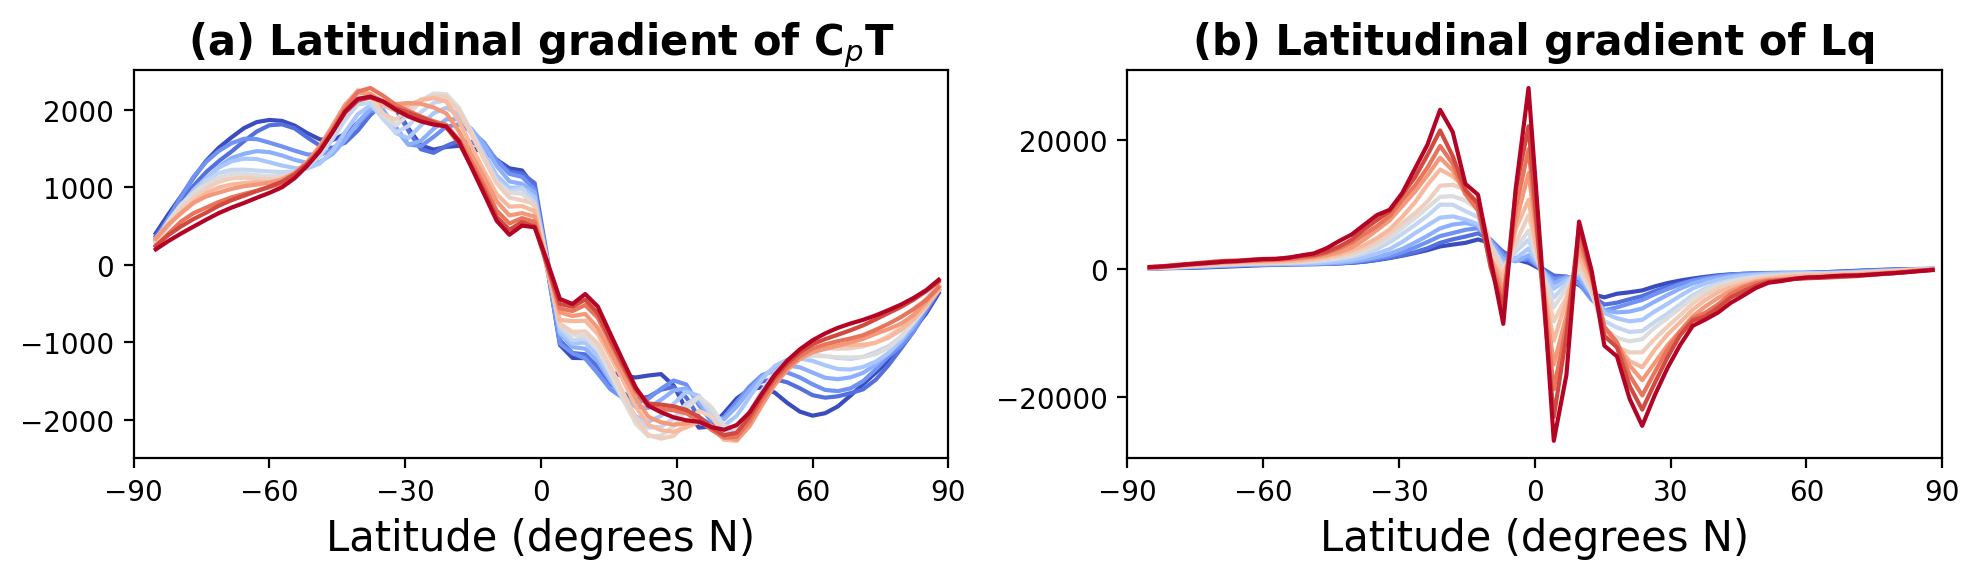

In [23]:
plt.figure(figsize=(10,3),dpi=200)
plt.subplot(121)
for i in range(len(ctl_)):
    (ctl_[i].t_surf*1004.6).diff('lat').plot(c=colors[i])
plt.xlim([-90,90])
plt.xticks(np.linspace(-90,90,7))
plt.xlabel('Latitude (degrees N)',fontsize=size)
plt.ylabel('')
plt.title('(a) Latitudinal gradient of C$_p$T',fontweight='bold',fontsize=size)
plt.subplot(122)
for i in range(len(ctl_)):
    (ctl_[i].sphum.sel(pfull=slice(850,950)).mean(('pfull'))*2.5e6).diff('lat').plot(c=colors[i])
plt.xlim([-90,90])
plt.xticks(np.linspace(-90,90,7))
plt.xlabel('Latitude (degrees N)',fontsize=size)
plt.ylabel('')
plt.title('(b) Latitudinal gradient of Lq',fontweight='bold',fontsize=size)
plt.tight_layout()
plt.savefig('./figs/figS1.pdf')
plt.show()

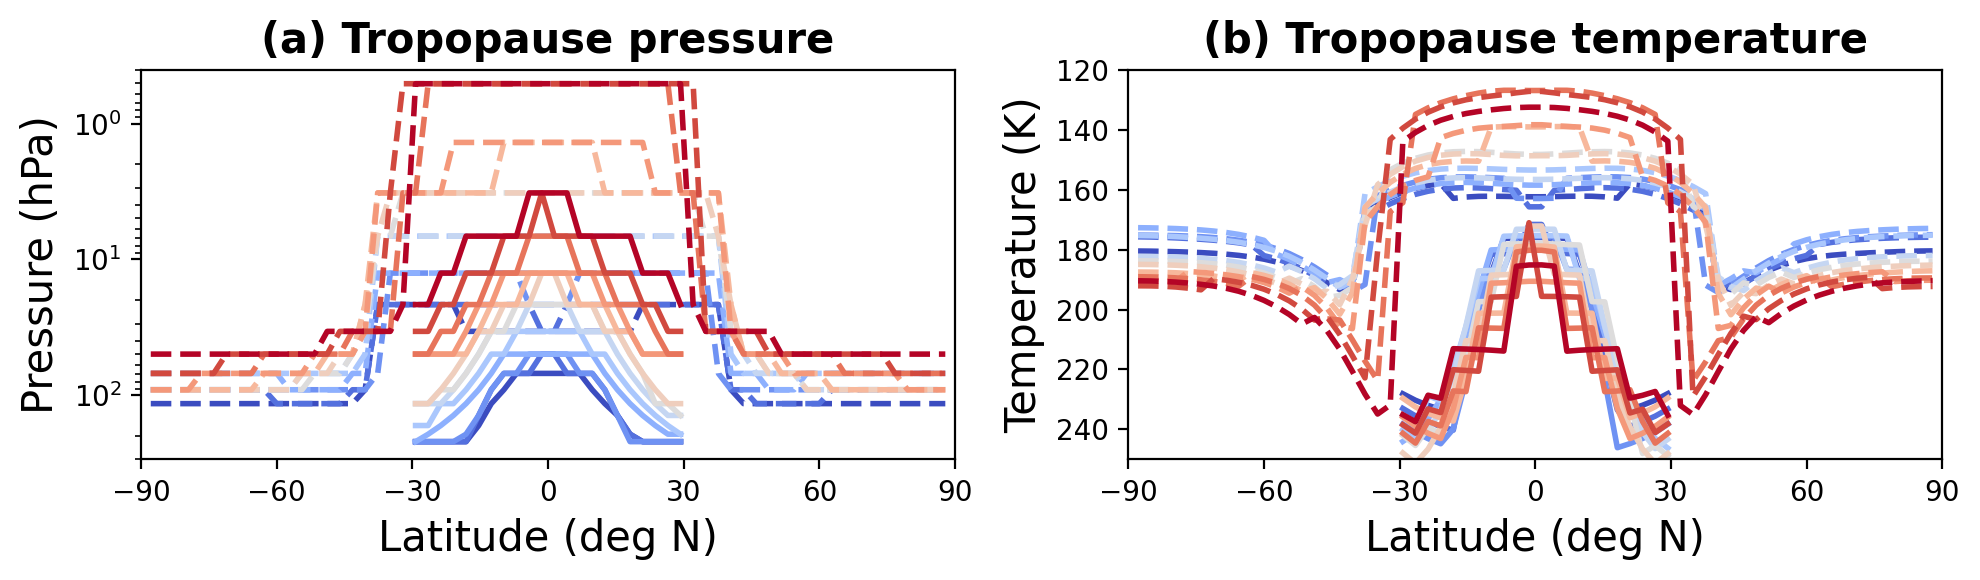

In [24]:
size=15
plt.figure(figsize=(10, 3),dpi=200)
plt.subplot(121)
for i in range(len(ctl_)):
    plt.plot(ctl_300.lat,p_trop[:,i],lw=2,c=colors[i],ls='--')
    plt.plot(ctl_300.lat[mask],p_trop_conv[mask,i],lw=2,c=colors[i])
plt.yscale('log')
plt.ylim([300,0.4])
plt.xlabel('Latitude (deg N)',fontsize=size)
plt.xticks(np.linspace(-90,90,7))
plt.xlim([-90,90])
plt.ylabel('Pressure (hPa)',fontsize=size)
plt.title('(a) Tropopause pressure',fontweight='bold',fontsize=size)
plt.subplot(122)
for i in range(len(ctl_)):
    plt.plot(ctl_300.lat,temp_trop[:,i],lw=2,c=colors[i],ls='--')
    plt.plot(ctl_300.lat[mask],temp_trop_conv[mask,i],lw=2,c=colors[i])
plt.ylim([250,120])
plt.xlabel('Latitude (deg N)',fontsize=size)
plt.xticks(np.linspace(-90,90,7))
plt.xlim([-90,90])
plt.ylabel('Temperature (K)',fontsize=size)
plt.title('(b) Tropopause temperature',fontweight='bold',fontsize=size)
plt.tight_layout()
plt.tight_layout()
plt.savefig('./figs/figS2.pdf')
plt.show()